# upload **CSV** which only has ***QUESTION***, ***REFERANCE ANSWER***, ***STUDENT ANSWER***, ***SCORE***  


In [2]:
!pip install scikit-learn==1.6.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 100.1 MB/s eta 0:00:0000:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


In [3]:
import pandas as pd
df = pd.read_csv("/kaggle/input/answer-sheet-eval-system-4500/final_merged_shuffled.csv")

In [4]:
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,ID,Question,Reference Answer,Student Answer,Evaluation Score,Semantic Similarity
0,141,What are the uses of embedded systems in autom...,Embedded systems in automotive electronics are...,Embedded systems play a vital role in automoti...,8,0.9387
1,43,"What is desertification, and what causes it?",Desertification is the process by which fertil...,Desertification is when deserts get bigger bec...,2,0.8476
2,147,What is the difference between active and pass...,Active electronic components are devices that ...,Active electronic components are those that ne...,5,0.9174
3,1240,What are the ethical concerns in AI-driven dec...,AI-driven decision-making raises several ethic...,AI decision-making is mostly about making thin...,4,0.6903
4,787,What is the significance of magical realism in...,Magical realism is a literary genre that incor...,Magical realism is just about adding magic to ...,4,0.7293
...,...,...,...,...,...,...
4495,1476,What are the main challenges in regulating cry...,The main challenges in regulating cryptocurren...,Regulating cryptocurrencies presents several s...,10,NaN
4496,840,How does misinformation affect democratic elec...,Misinformation can significantly undermine dem...,Misinformation affects elections by confusing ...,5,0.8036
4497,430,"What is reforestation, and why is it important?",Reforestation is the process of planting trees...,Reforestation is the act of replanting trees i...,10,0.9491
4498,1258,Why is multi-modal learning important for next...,Multi-modal learning is crucial for next-gener...,Multi-modal learning helps AI systems by using...,4,NaN


/tmp/ipykernel_35/4178806957.py:32: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


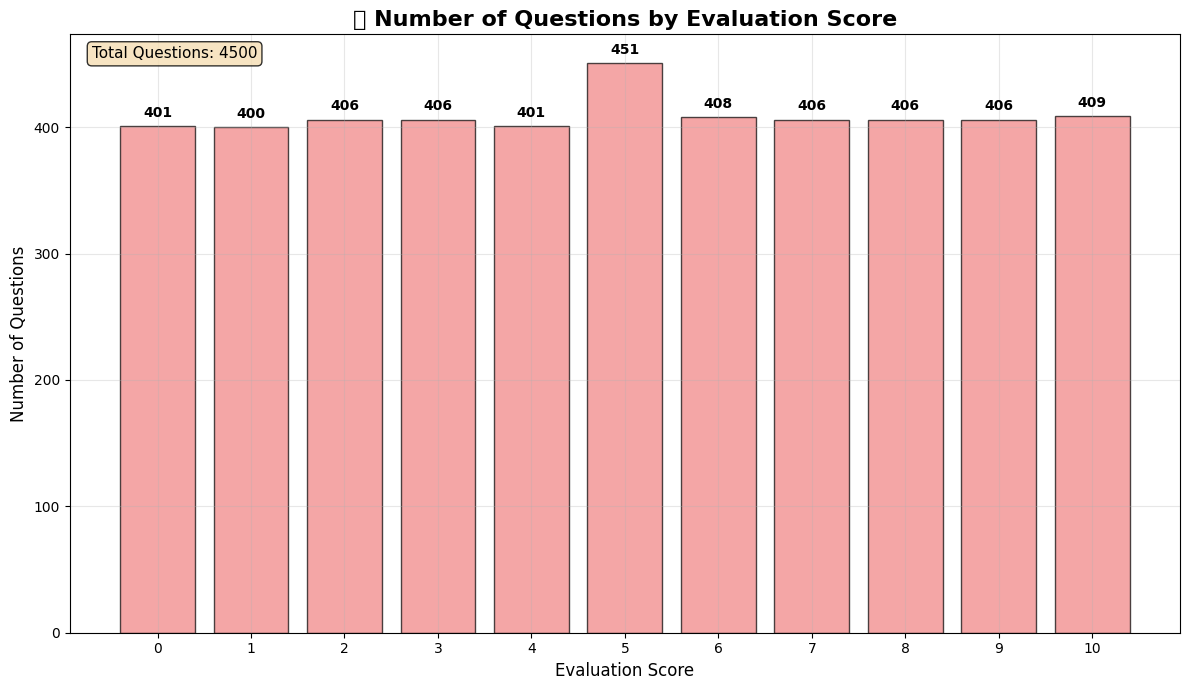

📋 Question Count by Evaluation Score:
-----------------------------------
Score 0: 401 questions
Score 1: 400 questions
Score 2: 406 questions
Score 3: 406 questions
Score 4: 401 questions
Score 5: 451 questions
Score 6: 408 questions
Score 7: 406 questions
Score 8: 406 questions
Score 9: 406 questions
Score 10: 409 questions
-----------------------------------
Total: 4500 questions


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Count the frequency of each evaluation score
score_counts = df['Evaluation Score'].value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(12, 7))
bars = plt.bar(score_counts.index, score_counts.values, color='lightcoral', alpha=0.7, edgecolor='black')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}',
             ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.title('📊 Number of Questions by Evaluation Score', fontsize=16, fontweight='bold')
plt.xlabel('Evaluation Score', fontsize=12)
plt.ylabel('Number of Questions', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(int(df['Evaluation Score'].min()), int(df['Evaluation Score'].max()) + 1))

# Add total count annotation
total_questions = len(df)
plt.text(0.02, 0.98, f'Total Questions: {total_questions}', 
         transform=plt.gca().transAxes, fontsize=11, 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
         verticalalignment='top')

plt.tight_layout()
plt.show()

# Print the exact counts
print("📋 Question Count by Evaluation Score:")
print("-" * 35)
for score in sorted(score_counts.index):
    print(f"Score {score}: {score_counts[score]} questions")
print("-" * 35)
print(f"Total: {total_questions} questions")


# NOW MAKING NEW COLS

* **Reference Answer Vector**
* **Student Answer Vecto**
* **Question Vector**
* **Semantic Similarity (cosine)**
* **Length Ratio**


* ### USING ***mpnet*** For vector embeddings
* ### USING ***mpnet*** For cosine *similiratiy*
 768 dimensions for MPNET

In [6]:
from sentence_transformers import SentenceTransformer
import numpy as np

# Load the recommended model
model = SentenceTransformer('all-mpnet-base-v2')

# Convert answers to vectors
ref_embeddings = model.encode(df['Reference Answer'])
stu_embeddings = model.encode(df['Student Answer'])
que_embeddings = model.encode(df['Question'])

# Calculate cosine similarity between reference and student answer vectors
from sklearn.metrics.pairwise import cosine_similarity
semantic_similarities = cosine_similarity(ref_embeddings, stu_embeddings).diagonal()

# Update the Semantic Similarity column
df['Semantic Similarity'] = semantic_similarities

# Store vectors as numpy arrays instead of lists
df['Reference Answer Vector'] = list(ref_embeddings)
df['Student Answer Vector'] = list(stu_embeddings)
df['Question Vector'] = list(que_embeddings)

# Add new column for ratio of lengths
df['Length Ratio'] = df['Student Answer'].str.len() / df['Reference Answer'].str.len()

2025-05-31 06:54:04.853163: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748674445.030347      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748674445.080539      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/141 [00:00<?, ?it/s]

Batches:   0%|          | 0/141 [00:00<?, ?it/s]

Batches:   0%|          | 0/141 [00:00<?, ?it/s]

# **Vector-Derived Features**

## 1. Question-Student Answer Similarity

In [7]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
df['question_student_similarity'] = cosine_similarity(
    np.stack(df['Question Vector'].tolist()),
    np.stack(df['Student Answer Vector'].tolist())
).diagonal()

# adding POS (parts of speech) columns/ FEATURES

### high corr:
* ***POS_similarity***
* ***POS_noun_ratio_diff***:
* ***POS_verb_ratio_diff***
* ***POS_pos_diversity_diff***

### lower corr:
* POS_adj_ratio_diff
* POS_adv_ratio_diff



In [8]:
import nltk
from nltk import pos_tag, word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt_tab') # Download the punkt_tab resource


def get_pos_features(text):
    tokens = word_tokenize(text.lower())
    pos_tags = pos_tag(tokens)

    pos_counts = {}
    for _, tag in pos_tags:
        pos_counts[tag] = pos_counts.get(tag, 0) + 1

    total_words = len(tokens)

    return {
        'noun_ratio': (pos_counts.get('NN', 0) + pos_counts.get('NNS', 0) +
                       pos_counts.get('NNP', 0) + pos_counts.get('NNPS', 0)) / total_words,
        'verb_ratio': (pos_counts.get('VB', 0) + pos_counts.get('VBD', 0) +
                       pos_counts.get('VBG', 0) + pos_counts.get('VBN', 0) +
                       pos_counts.get('VBP', 0) + pos_counts.get('VBZ', 0)) / total_words,
        'adj_ratio': (pos_counts.get('JJ', 0) + pos_counts.get('JJR', 0) +
                      pos_counts.get('JJS', 0)) / total_words,
        'adv_ratio': (pos_counts.get('RB', 0) + pos_counts.get('RBR', 0) +
                      pos_counts.get('RBS', 0)) / total_words,
        'pos_diversity': len(pos_counts) / total_words
    }

# Apply POS features to student and reference answers
df['Student_POS_Features'] = df['Student Answer'].apply(get_pos_features)
df['Reference_POS_Features'] = df['Reference Answer'].apply(get_pos_features)

# Create new columns
for feature in ['noun_ratio', 'verb_ratio', 'adj_ratio', 'adv_ratio', 'pos_diversity']:
    df[f'Student_{feature}'] = df['Student_POS_Features'].apply(lambda x: x[feature])
    df[f'Reference_{feature}'] = df['Reference_POS_Features'].apply(lambda x: x[feature])
    df[f'POS_{feature}_diff'] = df[f'Student_{feature}'] - df[f'Reference_{feature}']

# Calculate overall POS similarity
df['POS_similarity'] = 1 - (
    abs(df['POS_noun_ratio_diff']) +
    abs(df['POS_verb_ratio_diff']) +
    abs(df['POS_adj_ratio_diff']) +
    abs(df['POS_adv_ratio_diff']) +
    abs(df['POS_pos_diversity_diff'])
) / 5

try_df = df.copy()

# Remove intermediate columns
df = df.drop(['Student_POS_Features', 'Reference_POS_Features'], axis=1)
# List of columns to drop (those inside brackets)
columns_to_drop = [
    'Student_adj_ratio', 'Reference_adj_ratio',
    'Student_adv_ratio', 'Reference_adv_ratio',
    'Student_pos_diversity', 'Reference_pos_diversity',
    'Student_noun_ratio','Reference_noun_ratio',
    'Reference_verb_ratio', 'Student_verb_ratio']

   # 'POS_pos_diversity_diff', 'POS_verb_ratio_diff',
   # 'POS_adv_ratio_diff', 'POS_adj_ratio_diff'
#]

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /usr/share/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### df with all the culmuns

In [9]:
try_df

,ID,Question,Reference Answer,Student Answer,Evaluation Score,Semantic Similarity,Reference Answer Vector,Student Answer Vector,Question Vector,Length Ratio,...,Student_adj_ratio,Reference_adj_ratio,POS_adj_ratio_diff,Student_adv_ratio,Reference_adv_ratio,POS_adv_ratio_diff,Student_pos_diversity,Reference_pos_diversity,POS_pos_diversity_diff,POS_similarity
0,141,What are the uses of embedded systems in autom...,Embedded systems in automotive electronics are...,Embedded systems play a vital role in automoti...,8,0.971047,"[-0.026714677, -0.122584954, -0.041071467, 0.0...","[-0.035916984, -0.108392775, -0.043855052, 0.0...","[-0.011273809, -0.09969495, -0.036408093, 0.01...",1.041779,...,0.116667,0.113821,0.002846,0.016667,0.024390,-0.007724,0.158333,0.154472,0.003862,0.984634
1,43,"What is desertification, and what causes it?",Desertification is the process by which fertil...,Desertification is when deserts get bigger bec...,2,0.826221,"[0.02058247, -0.015109419, 0.0082780225, -0.00...","[0.032064583, -0.02290476, -0.005840397, -0.00...","[0.015986951, -0.0351313, -0.013215341, -0.004...",0.317343,...,0.093750,0.146341,-0.052591,0.156250,0.024390,0.131860,0.531250,0.182927,0.348323,0.830793
2,147,What is the difference between active and pass...,Active electronic components are devices that ...,Active electronic components are those that ne...,5,0.894303,"[-0.008263042, -0.090552256, -0.034627266, -0....","[-0.005083254, -0.0603671, -0.022377204, -0.01...","[0.015138741, -0.10430029, -0.03323159, -0.031...",0.487500,...,0.094340,0.104167,-0.009827,0.037736,0.020833,0.016903,0.283019,0.177083,0.105936,0.957272
3,1240,What are the ethical concerns in AI-driven dec...,AI-driven decision-making raises several ethic...,AI decision-making is mostly about making thin...,4,0.797446,"[0.0011151013, 0.09844997, -0.029731292, -0.03...","[0.007665609, 0.07971347, -0.044150718, -0.037...","[0.0046415376, 0.09150052, -0.023545917, -0.03...",0.191388,...,0.062500,0.113333,-0.050833,0.125000,0.046667,0.078333,0.562500,0.146667,0.415833,0.881250
4,787,What is the significance of magical realism in...,Magical realism is a literary genre that incor...,Magical realism is just about adding magic to ...,4,0.741747,"[0.012758839, 0.008528414, -0.013054066, 0.024...","[0.04060991, 0.015284671, 0.004421723, 0.02528...","[0.029956935, 0.0022901716, -0.017042654, -0.0...",0.338640,...,0.133333,0.174312,-0.040979,0.155556,0.018349,0.137207,0.333333,0.183486,0.149847,0.896147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,1476,What are the main challenges in regulating cry...,The main challenges in regulating cryptocurren...,Regulating cryptocurrencies presents several s...,10,0.975554,"[0.081637196, 0.04392158, -0.011673738, -0.022...","[0.06442837, 0.046149675, -0.009258776, -0.016...","[0.100320324, 0.045988165, -0.011260875, -0.02...",1.062567,...,0.136691,0.148148,-0.011458,0.050360,0.037037,0.013323,0.129496,0.140741,-0.011244,0.988031
4496,840,How does misinformation affect democratic elec...,Misinformation can significantly undermine dem...,Misinformation affects elections by confusing ...,5,0.830477,"[-0.029589357, 0.03811715, -0.017739035, 0.014...","[-0.030130034, 0.035857137, -0.008704043, 0.03...","[-0.040431287, 0.053502783, -0.027384058, 0.00...",0.433878,...,0.020408,0.118812,-0.098404,0.102041,0.049505,0.052536,0.326531,0.198020,0.128511,0.942695
4497,430,"What is reforestation, and why is it important?",Reforestation is the process of planting trees...,Reforestation is the act of replanting trees i...,10,0.973022,"[0.044359207, -0.004624164, 0.015487544, 0.038...","[0.029268024, -0.022819083, 0.008046776, 0.037...","[0.029483585, -0.0022045486, 0.0058249272, 0.0...",0.912381,...,0.097222,0.060241,0.036981,0.027778,0.012048,0.015730,0.166667,0.228916,-0.062249,0.971285
4498,1258,Why is multi-modal learning important for next...,Multi-modal learning is crucial for next-gener...,Multi-modal learn

## df with choosed features

In [10]:
df

,ID,Question,Reference Answer,Student Answer,Evaluation Score,Semantic Similarity,Reference Answer Vector,Student Answer Vector,Question Vector,Length Ratio,question_student_similarity,POS_noun_ratio_diff,POS_verb_ratio_diff,POS_adj_ratio_diff,POS_adv_ratio_diff,POS_pos_diversity_diff,POS_similarity
0,141,What are the uses of embedded systems in autom...,Embedded systems in automotive electronics are...,Embedded systems play a vital role in automoti...,8,0.971047,"[-0.026714677, -0.122584954, -0.041071467, 0.0...","[-0.035916984, -0.108392775, -0.043855052, 0.0...","[-0.011273809, -0.09969495, -0.036408093, 0.01...",1.041779,0.731026,0.049593,-0.012805,0.002846,-0.007724,0.003862,0.984634
1,43,"What is desertification, and what causes it?",Desertification is the process by which fertil...,Desertification is when deserts get bigger bec...,2,0.826221,"[0.02058247, -0.015109419, 0.0082780225, -0.00...","[0.032064583, -0.02290476, -0.005840397, -0.00...","[0.015986951, -0.0351313, -0.013215341, -0.004...",0.317343,0.790324,-0.160823,0.152439,-0.052591,0.131860,0.348323,0.830793
2,147,What is the difference between active and pass...,Active electronic components are devices that ...,Active electronic components are those that ne...,5,0.894303,"[-0.008263042, -0.090552256, -0.034627266, -0....","[-0.005083254, -0.0603671, -0.022377204, -0.01...","[0.015138741, -0.10430029, -0.03323159, -0.031...",0.487500,0.830212,-0.054835,-0.026140,-0.009827,0.016903,0.105936,0.957272
3,1240,What are the ethical concerns in AI-driven dec...,AI-driven decision-making raises several ethic...,AI decision-making is mostly about making thin...,4,0.797446,"[0.0011151013, 0.09844997, -0.029731292, -0.03...","[0.007665609, 0.07971347, -0.044150718, -0.037...","[0.0046415376, 0.09150052, -0.023545917, -0.03...",0.191388,0.744572,-0.027917,0.020833,-0.050833,0.078333,0.415833,0.881250
4,787,What is the significance of magical realism in...,Magical realism is a literary genre that incor...,Magical realism is just about adding magic to ...,4,0.741747,"[0.012758839, 0.008528414, -0.013054066, 0.024...","[0.04060991, 0.015284671, 0.004421723, 0.02528...","[0.029956935, 0.0022901716, -0.017042654, -0.0...",0.338640,0.786247,-0.088277,0.102956,-0.040979,0.137207,0.149847,0.896147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,1476,What are the main challenges in regulating cry...,The main challenges in regulating cryptocurren...,Regulating cryptocurrencies presents several s...,10,0.975554,"[0.081637196, 0.04392158, -0.011673738, -0.022...","[0.06442837, 0.046149675, -0.009258776, -0.016...","[0.100320324, 0.045988165, -0.011260875, -0.02...",1.062567,0.713284,0.006288,0.017533,-0.011458,0.013323,-0.011244,0.988031
4496,840,How does misinformation affect democratic elec...,Misinformation can significantly undermine dem...,Misinformation affects elections by confusing ...,5,0.830477,"[-0.029589357, 0.03811715, -0.017739035, 0.014...","[-0.030130034, 0.035857137, -0.008704043, 0.03...","[-0.040431287, 0.053502783, -0.027384058, 0.00...",0.433878,0.786203,-0.001414,-0.005658,-0.098404,0.052536,0.128511,0.942695
4497,430,"What is reforestation, and why is it important?",Reforestation is the process of planting trees...,Reforestation is the act of replanting trees i...,10,0.973022,"[0.044359207, -0.004624164, 0.015487544, 0.038...","[0.029268024, -0.022819083, 0.008046776, 0.037...","[0.029483585, -0.0022045486, 0.0058249272, 0.0...",0.912381,0.874703,0.006191,-0.022423,0.036981,0.015730,-0.062249,0.971285
4498,1258,Why is multi-modal learning important for next...,Multi-modal learning is crucial for next-gener...,Multi-modal learning helps AI systems by using...,4,0.816663,"[-0.046450403, 0.037722684, -0.011372205, -0.0...","[-0.045407474, 0.064829946, -0.038900893, -0.0...","[-0.037202194, 0.08478819, -0.018975262, -0.05...",0.185422,0.761227,-0.087731,0.050756,0.105546,-0.033613,0.320336,0.880403


# Readability Columns

In [11]:
!pip install textstat

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 67.3 MB/s eta 0:00:00


In [12]:
import textstat

# Function to get readability scores
def get_readability_scores(reference_answer, student_answer):
    ref_fk = textstat.flesch_kincaid_grade(reference_answer)
    student_fk = textstat.flesch_kincaid_grade(student_answer)

    # Calculate ratio (with zero division protection)
    flesch_kincaid_ratio = student_fk / ref_fk if ref_fk != 0 else 0

    return {"flesch_kincaid_ratio": flesch_kincaid_ratio}

# Apply function and extract only 'flesch_kincaid_ratio'
df["flesch_kincaid_ratio"] = df.apply(lambda row: get_readability_scores(row["Reference Answer"], row["Student Answer"])["flesch_kincaid_ratio"], axis=1)
try_df["flesch_kincaid_ratio"] = df.apply(lambda row: get_readability_scores(row["Reference Answer"], row["Student Answer"])["flesch_kincaid_ratio"], axis=1)

# now knowing df

In [13]:
pd.set_option("display.max_columns",None)
df

,ID,Question,Reference Answer,Student Answer,Evaluation Score,Semantic Similarity,Reference Answer Vector,Student Answer Vector,Question Vector,Length Ratio,question_student_similarity,POS_noun_ratio_diff,POS_verb_ratio_diff,POS_adj_ratio_diff,POS_adv_ratio_diff,POS_pos_diversity_diff,POS_similarity,flesch_kincaid_ratio
0,141,What are the uses of embedded systems in autom...,Embedded systems in automotive electronics are...,Embedded systems play a vital role in automoti...,8,0.971047,"[-0.026714677, -0.122584954, -0.041071467, 0.0...","[-0.035916984, -0.108392775, -0.043855052, 0.0...","[-0.011273809, -0.09969495, -0.036408093, 0.01...",1.041779,0.731026,0.049593,-0.012805,0.002846,-0.007724,0.003862,0.984634,1.011748
1,43,"What is desertification, and what causes it?",Desertification is the process by which fertil...,Desertification is when deserts get bigger bec...,2,0.826221,"[0.02058247, -0.015109419, 0.0082780225, -0.00...","[0.032064583, -0.02290476, -0.005840397, -0.00...","[0.015986951, -0.0351313, -0.013215341, -0.004...",0.317343,0.790324,-0.160823,0.152439,-0.052591,0.131860,0.348323,0.830793,0.543168
2,147,What is the difference between active and pass...,Active electronic components are devices that ...,Active electronic components are those that ne...,5,0.894303,"[-0.008263042, -0.090552256, -0.034627266, -0....","[-0.005083254, -0.0603671, -0.022377204, -0.01...","[0.015138741, -0.10430029, -0.03323159, -0.031...",0.487500,0.830212,-0.054835,-0.026140,-0.009827,0.016903,0.105936,0.957272,0.633515
3,1240,What are the ethical concerns in AI-driven dec...,AI-driven decision-making raises several ethic...,AI decision-making is mostly about making thin...,4,0.797446,"[0.0011151013, 0.09844997, -0.029731292, -0.03...","[0.007665609, 0.07971347, -0.044150718, -0.037...","[0.0046415376, 0.09150052, -0.023545917, -0.03...",0.191388,0.744572,-0.027917,0.020833,-0.050833,0.078333,0.415833,0.881250,0.596887
4,787,What is the significance of magical realism in...,Magical realism is a literary genre that incor...,Magical realism is just about adding magic to ...,4,0.741747,"[0.012758839, 0.008528414, -0.013054066, 0.024...","[0.04060991, 0.015284671, 0.004421723, 0.02528...","[0.029956935, 0.0022901716, -0.017042654, -0.0...",0.338640,0.786247,-0.088277,0.102956,-0.040979,0.137207,0.149847,0.896147,0.446034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,1476,What are the main challenges in regulating cry...,The main challenges in regulating cryptocurren...,Regulating cryptocurrencies presents several s...,10,0.975554,"[0.081637196, 0.04392158, -0.011673738, -0.022...","[0.06442837, 0.046149675, -0.009258776, -0.016...","[0.100320324, 0.045988165, -0.011260875, -0.02...",1.062567,0.713284,0.006288,0.017533,-0.011458,0.013323,-0.011244,0.988031,0.970433
4496,840,How does misinformation affect democratic elec...,Misinformation can significantly undermine dem...,Misinformation affects elections by confusing ...,5,0.830477,"[-0.029589357, 0.03811715, -0.017739035, 0.014...","[-0.030130034, 0.035857137, -0.008704043, 0.03...","[-0.040431287, 0.053502783, -0.027384058, 0.00...",0.433878,0.786203,-0.001414,-0.005658,-0.098404,0.052536,0.128511,0.942695,0.681585
4497,430,"What is reforestation, and why is it important?",Reforestation is the process of planting trees...,Reforestation is the act of replanting trees i...,10,0.973022,"[0.044359207, -0.004624164, 0.015487544, 0.038...","[0.029268024, -0.022819083, 0.008046776, 0.037...","[0.029483585, -0.0022045486, 0.0058249272, 0.0...",0.912381,0.874703,0.006191,-0.022423,0.036981,0.015730,-0.062249,0.971285,1.104643
4498,1258,Why is multi-modal learning important for next...,Multi-modal learning is crucial for next-gener...,Multi-modal learning helps AI systems by using...,4,0.816663,"[-0.046450403, 0.037722684, -0.011372205, -0.0...","[-0.045407474, 0.064829946, -0.038900893, -0.0...","[-0.037202194, 0.08478819, -0.018975262, -0.05...",0.185422,0.76122

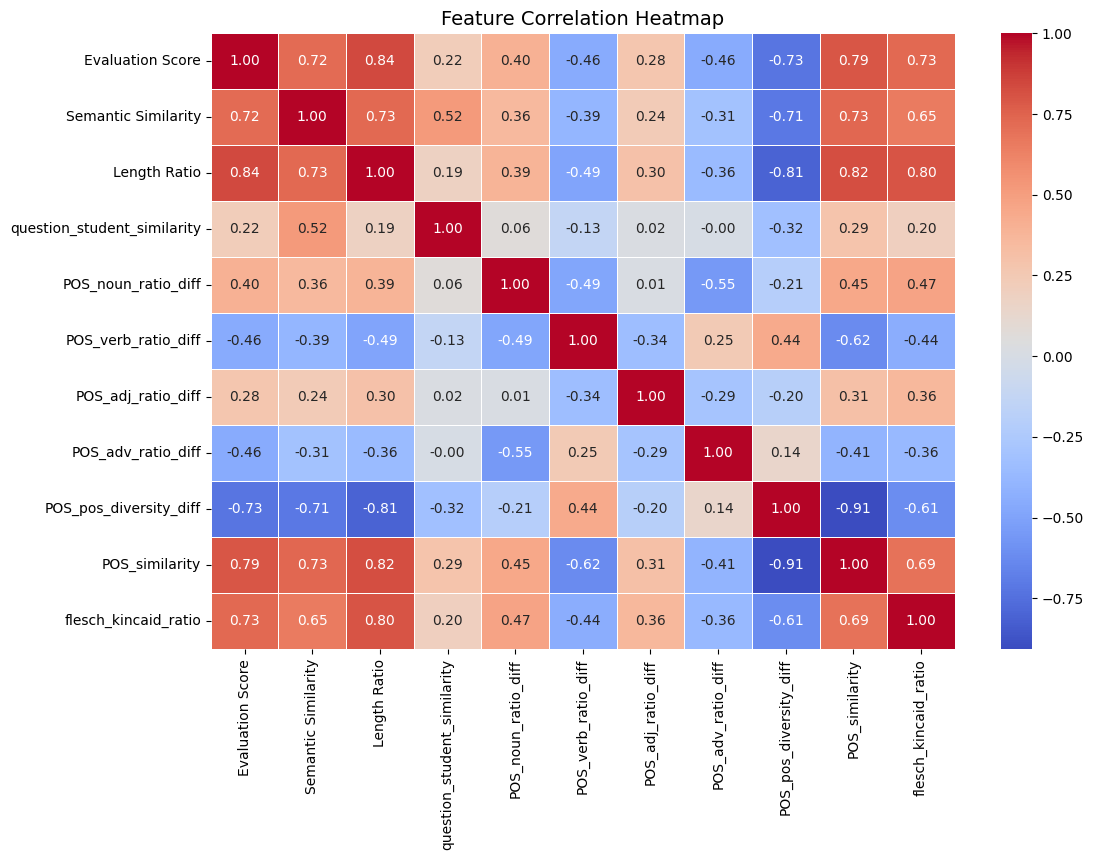

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
# Now we can compute the correlation matrix using the principal components
numeric_df = df.drop(columns=['ID', 'Question', 'Reference Answer', 'Student Answer','Reference Answer Vector', 'Student Answer Vector', 'Question Vector'])

# Compute correlation
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()


In [15]:
df.describe()

,ID,Evaluation Score,Semantic Similarity,Length Ratio,question_student_similarity,POS_noun_ratio_diff,POS_verb_ratio_diff,POS_adj_ratio_diff,POS_adv_ratio_diff,POS_pos_diversity_diff,POS_similarity,flesch_kincaid_ratio
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,750.500000,5.015778,0.835065,0.449119,0.769272,-0.051951,0.045932,-0.021032,0.036458,0.187081,0.920999,0.658934
std,433.060726,3.145359,0.105499,0.287295,0.074759,0.065408,0.048703,0.049206,0.053445,0.160002,0.049032,0.252871
min,1.000000,0.000000,0.198132,0.019589,0.098653,-0.287046,-0.151079,-0.210526,-0.085938,-0.067544,0.719259,-0.179470
25%,375.750000,2.000000,0.769102,0.243729,0.733497,-0.096539,0.011577,-0.052651,-0.001935,0.062672,0.890631,0.473644
50%,750.500000,5.000000,0.847122,0.354406,0.781398,-0.048912,0.042137,-0.018551,0.023995,0.170505,0.922432,0.611562
75%,1125.250000,8.000000,0.922975,0.634947,0.818947,-0.005989,0.074074,0.011331,0.068767,0.254189,0.965544,0.862383
max,1500.000000,10.000000,0.995103,1.428235,0.925359,0.337900,0.357143,0.268620,0.250749,0.888889,0.996104,1.999604


In [16]:
df.describe().columns.drop("ID")

Index(['Evaluation Score', 'Semantic Similarity', 'Length Ratio',
       'question_student_similarity', 'POS_noun_ratio_diff',
       'POS_verb_ratio_diff', 'POS_adj_ratio_diff', 'POS_adv_ratio_diff',
       'POS_pos_diversity_diff', 'POS_similarity', 'flesch_kincaid_ratio'],
      dtype='object')

In [17]:
!pip install mord

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Preparing metadata (setup.py) ... done
  Created wheel for mord: filename=mord-0.7-py3-none-any.whl size=9885 sha256=01ad0f8d72e4fabbe427ef211676eda425a6fe059eb8f2c9ac5acf1c9d740522
  Stored in directory: /root/.cache/pip/wheels/d1/fc/57/f2a2ad4ed0491ab6d5bb8642a90f1da9469397641e914743da
Successfully built mord


In [18]:
!pip install pytorch-tabnet

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 2.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.5 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existing in

# Data Preparation and Setup python

In [19]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Input columns
features = [
    'Semantic Similarity', 'Length Ratio', 'question_student_similarity',
    'POS_noun_ratio_diff', 'POS_similarity', 'flesch_kincaid_ratio',
    'POS_pos_diversity_diff', 'POS_verb_ratio_diff',
    'POS_adv_ratio_diff', 'POS_adj_ratio_diff'
]

X = df[features]
y = df['Evaluation Score'].astype(int)

print(f"Dataset shape: {X.shape}")
print(f"Target distribution: {np.bincount(y)}")


Dataset shape: (4500, 10)
Target distribution: [401 400 406 406 401 451 408 406 406 406 409]


# Train-Validation-Test Split python

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

# Stratified Train/Validation/Test Split (70%/15%/15%)
print("📊 STRATIFIED SAMPLING FOR ORDINAL CLASSIFICATION WITH SMOTE")
print("=" * 60)

# First split: Training (70%) vs Temp (30%)
X_train_original, X_temp, y_train_original, y_temp = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y
)

# Second split: Validation (15%) vs Test (15%) from the 30% temp
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, 
    test_size=0.5,  # 50% of 30% = 15% of total
    random_state=42, 
    stratify=y_temp
)

# Apply SMOTE to training data BEFORE scaling
print("\n🔄 APPLYING SMOTE TO TRAINING DATA:")
print("=" * 40)

# Check original training distribution
unique_train, counts_train = np.unique(y_train_original, return_counts=True)
print("Original training class distribution:")
for cls, count in zip(unique_train, counts_train):
    print(f"  Class {cls}: {count} samples")

# Apply SMOTE with balanced strategy
smote = SMOTE(
    sampling_strategy='auto',  # Balance all classes
    random_state=42,
    k_neighbors=5
)

X_train, y_train = smote.fit_resample(X_train_original, y_train_original)

# Check new training distribution
unique_new, counts_new = np.unique(y_train, return_counts=True)
print(f"\nAfter SMOTE training class distribution:")
for cls, count in zip(unique_new, counts_new):
    original_count = counts_train[unique_train == cls][0] if cls in unique_train else 0
    increase = count - original_count
    print(f"  Class {cls}: {original_count} → {count} (+{increase})")

print(f"\nTraining set size: {len(X_train_original)} → {len(X_train)} (+{len(X_train) - len(X_train_original)})")

# Verify stratification worked (validation and test unchanged)
print(f"\n🔍 Class Distribution Verification:")
print(f"{'Class':<8} {'Original':<10} {'Train(SMOTE)':<12} {'Validation':<12} {'Test':<10}")
print("-" * 70)

for cls in range(11):
    orig_count = np.sum(y == cls)
    train_count = np.sum(y_train == cls)
    val_count = np.sum(y_val == cls)
    test_count = np.sum(y_test == cls)
    
    orig_pct = orig_count / len(y) * 100
    train_pct = train_count / len(y_train) * 100
    val_pct = val_count / len(y_val) * 100
    test_pct = test_count / len(y_test) * 100
    
    print(f"{cls:<8} {orig_count}({orig_pct:.1f}%) {train_count}({train_pct:.1f}%) {val_count}({val_pct:.1f}%) {test_count}({test_pct:.1f}%)")

# Standard scaling (fit on SMOTE-enhanced training data)
print(f"\n⚖️ FEATURE SCALING:")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(f"✅ Scaler fitted on SMOTE-enhanced training data")
print(f"✅ Applied to validation and test data")

# Dataset size summary
print(f"\n📏 DATASET SIZES:")
print(f"Training set: {X_train_scaled.shape[0]} samples ({X_train_scaled.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set: {X_val_scaled.shape[0]} samples ({X_val_scaled.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test_scaled.shape[0]} samples ({X_test_scaled.shape[0]/len(X)*100:.1f}%)")
print(f"Total original: {len(X)} samples")

# Verify no data leakage
print(f"\n🔒 DATA INTEGRITY CHECK:")
print(f"✅ SMOTE applied only to training data")
print(f"✅ Validation and test sets remain untouched")
print(f"✅ Training and validation sets are separate")
print(f"✅ Training and test sets are separate") 
print(f"✅ Validation and test sets are separate")
print(f"✅ Stratification maintains class distribution in val/test")
print(f"✅ Scaler prevents data leakage")

print(f"\n🎯 PROPER ML METHODOLOGY WITH SMOTE:")
print(f"• Use X_train_scaled, y_train for model training (SMOTE-enhanced)")
print(f"• Use X_val_scaled, y_val for model selection & hyperparameter tuning")
print(f"• Use X_test_scaled, y_test for final unbiased evaluation (once only!)")
print(f"• SMOTE applied only to training data - no data leakage")
print(f"• All variable names maintained for compatibility")


📊 STRATIFIED SAMPLING FOR ORDINAL CLASSIFICATION WITH SMOTE

🔄 APPLYING SMOTE TO TRAINING DATA:
Original training class distribution:
  Class 0: 281 samples
  Class 1: 280 samples
  Class 2: 284 samples
  Class 3: 284 samples
  Class 4: 281 samples
  Class 5: 316 samples
  Class 6: 286 samples
  Class 7: 284 samples
  Class 8: 284 samples
  Class 9: 284 samples
  Class 10: 286 samples

After SMOTE training class distribution:
  Class 0: 281 → 316 (+35)
  Class 1: 280 → 316 (+36)
  Class 2: 284 → 316 (+32)
  Class 3: 284 → 316 (+32)
  Class 4: 281 → 316 (+35)
  Class 5: 316 → 316 (+0)
  Class 6: 286 → 316 (+30)
  Class 7: 284 → 316 (+32)
  Class 8: 284 → 316 (+32)
  Class 9: 284 → 316 (+32)
  Class 10: 286 → 316 (+30)

Training set size: 3150 → 3476 (+326)

🔍 Class Distribution Verification:
Class    Original   Train(SMOTE) Validation   Test      
----------------------------------------------------------------------
0        401(8.9%) 316(9.1%) 60(8.9%) 60(8.9%)
1        400(8.9%) 316(

# Traditional Ordinal Models

In [21]:
from mord import LogisticAT
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import gc

# 1. Logistic All-Threshold
print("Training Logistic All-Threshold...")
log_at_model = LogisticAT(alpha=1.0, max_iter=1000)
log_at_model.fit(X_train_scaled, y_train)

# 2. XGBoost Ordinal
print("Training XGBoost...")
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)

# 3. Random Forest
print("Training Random Forest...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=8,
    random_state=42,
    class_weight='balanced'
)
rf_model.fit(X_train_scaled, y_train)

# 4. Decision Tree
print("Training Decision Tree...")
dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=8,
    min_samples_split=5,
    random_state=42
)
dt_model.fit(X_train_scaled, y_train)

gc.collect()
print("✅ Traditional models trained successfully!")


Training Logistic All-Threshold...
Training XGBoost...
Training Random Forest...
Training Decision Tree...
✅ Traditional models trained successfully!


# TabNet Model (Separate)

In [22]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
import gc

# Clear memory first
if torch.cuda.is_available():
    torch.cuda.empty_cache()
gc.collect()

print("Training TabNet...")
tabnet_model = TabNetClassifier(
    n_d=8,
    n_a=8,
    n_steps=3,
    gamma=1.3,
    lambda_sparse=1e-3,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=1e-2),
    mask_type='entmax',
    verbose=1,
    seed=42
)

tabnet_model.fit(
    X_train_scaled, y_train,
    eval_set=[(X_val_scaled, y_val)],
    eval_name=['val'],
    eval_metric=['accuracy'],
    max_epochs=500,
    patience=20,
    batch_size=64,          # batch_size goes here in fit()
    virtual_batch_size=32   # virtual_batch_size goes here in fit()
)

print("✅ TabNet trained successfully!")


Training TabNet...
epoch 0  | loss: 2.42561 | val_accuracy: 0.2     |  0:00:01s
epoch 1  | loss: 1.964   | val_accuracy: 0.23111 |  0:00:02s
epoch 2  | loss: 1.76978 | val_accuracy: 0.27259 |  0:00:04s
epoch 3  | loss: 1.65449 | val_accuracy: 0.27556 |  0:00:05s
epoch 4  | loss: 1.6311  | val_accuracy: 0.30222 |  0:00:06s
epoch 5  | loss: 1.59874 | val_accuracy: 0.31259 |  0:00:07s
epoch 6  | loss: 1.60143 | val_accuracy: 0.31259 |  0:00:09s
epoch 7  | loss: 1.57813 | val_accuracy: 0.32593 |  0:00:10s
epoch 8  | loss: 1.55561 | val_accuracy: 0.30815 |  0:00:11s
epoch 9  | loss: 1.55792 | val_accuracy: 0.30963 |  0:00:12s
epoch 10 | loss: 1.56681 | val_accuracy: 0.32    |  0:00:14s
epoch 11 | loss: 1.5547  | val_accuracy: 0.28889 |  0:00:15s
epoch 12 | loss: 1.54176 | val_accuracy: 0.29333 |  0:00:16s
epoch 13 | loss: 1.54156 | val_accuracy: 0.32148 |  0:00:18s
epoch 14 | loss: 1.5398  | val_accuracy: 0.33778 |  0:00:19s
epoch 15 | loss: 1.5257  | val_accuracy: 0.31111 |  0:00:20s
epoch

# Gradient Boosting Model

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
import gc

# Add Gradient Boosting to your existing models
print("Training Gradient Boosting...")
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=42,
    verbose=0
)
gb_model.fit(X_train_scaled, y_train)

gc.collect()
print("✅ Gradient Boosting trained successfully!")


Training Gradient Boosting...
✅ Gradient Boosting trained successfully!


#  Evaluation Functions

In [24]:
from sklearn.metrics import accuracy_score, mean_absolute_error, cohen_kappa_score

def evaluate_model(model, X_data, y_true, model_type="standard"):
    """Evaluate model with ordinal metrics"""
    
    if model_type == "neural":
        y_pred_proba = model.predict(X_data, verbose=0)
        y_pred = np.argmax(y_pred_proba, axis=1)
    elif model_type == "tabnet":
        y_pred = model.predict(X_data)
    else:
        y_pred = model.predict(X_data)
    
    accuracy = accuracy_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    qwk = cohen_kappa_score(y_true, y_pred, weights='quadratic')
    one_off = np.mean(np.abs(y_true - y_pred) <= 1)
    
    return {
        'accuracy': accuracy,
        'mae': mae,
        'qwk': qwk,
        'one_off_accuracy': one_off
    }

print("✅ Evaluation functions for classification ready!")


✅ Evaluation functions for classification ready!


# Model Evaluation

In [25]:
# Define models including Gradient Boosting
models = {
    'Logistic AT': (log_at_model, "standard"),
    'XGBoost': (xgb_model, "standard"),
    'Random Forest': (rf_model, "standard"),
    'Gradient Boosting': (gb_model, "standard"),
    'Decision Tree': (dt_model, "standard"),
    'TabNet': (tabnet_model, "tabnet"),
}

print("📊 Model Evaluation Results - Train vs Validation:")
print(f"{'Model':<17} {'Split':<12} {'Accuracy':>8} {'MAE':>6} {'QWK':>6} {'1-off':>6}")
print("-" * 70)

results = {}

for name, (model, model_type) in models.items():
    try:
        # Train evaluation
        train_metrics = evaluate_model(model, X_train_scaled, y_train, model_type)
        
        # VALIDATION evaluation (for model selection)
        val_metrics = evaluate_model(model, X_val_scaled, y_val, model_type)
        
        results[name] = {'train': train_metrics, 'validation': val_metrics}
        
        print(f"{name:<17} {'Train':<12} {train_metrics['accuracy']:>8.3f} {train_metrics['mae']:>6.3f} {train_metrics['qwk']:>6.3f} {train_metrics['one_off_accuracy']:>6.3f}")
        print(f"{'':<17} {'Validation':<12} {val_metrics['accuracy']:>8.3f} {val_metrics['mae']:>6.3f} {val_metrics['qwk']:>6.3f} {val_metrics['one_off_accuracy']:>6.3f}")
        
        # Calculate overfitting indicators
        qwk_gap = train_metrics['qwk'] - val_metrics['qwk']
        acc_gap = train_metrics['accuracy'] - val_metrics['accuracy']
        
        if acc_gap > 0.1:
            overfitting_status = "HIGH"
        elif acc_gap > 0.05:
            overfitting_status = "MODERATE"
        else:
            overfitting_status = "LOW"
        
        print(f"{'':<17} {'Overfitting':<12} {overfitting_status} (QWK gap: {qwk_gap:+.3f})")
        print()
        
    except Exception as e:
        print(f"⚠️ Error evaluating {name}: {str(e)}")
        print()

# Model selection based on VALIDATION performance
print("🏆 Best Models by Validation Metrics:")
if results:
    best_qwk = max(results.keys(), key=lambda x: results[x]['validation']['qwk'])
    best_accuracy = max(results.keys(), key=lambda x: results[x]['validation']['accuracy'])
    best_mae = min(results.keys(), key=lambda x: results[x]['validation']['mae'])
    
    print(f"Best QWK: {best_qwk} ({results[best_qwk]['validation']['qwk']:.3f})")
    print(f"Best Accuracy: {best_accuracy} ({results[best_accuracy]['validation']['accuracy']:.3f})")
    print(f"Best MAE: {best_mae} ({results[best_mae]['validation']['mae']:.3f})")
    

📊 Model Evaluation Results - Train vs Validation:
Model             Split        Accuracy    MAE    QWK  1-off
----------------------------------------------------------------------
Logistic AT       Train           0.283  1.108  0.884  0.721
                  Validation      0.295  1.111  0.881  0.716
                  Overfitting  LOW (QWK gap: +0.004)

XGBoost           Train           0.700  0.580  0.927  0.837
                  Validation      0.308  1.292  0.837  0.664
                  Overfitting  HIGH (QWK gap: +0.090)

Random Forest     Train           0.723  0.591  0.917  0.831
                  Validation      0.351  1.244  0.833  0.674
                  Overfitting  HIGH (QWK gap: +0.085)

Gradient Boosting Train           0.961  0.094  0.985  0.974
                  Validation      0.302  1.323  0.823  0.647
                  Overfitting  HIGH (QWK gap: +0.161)

Decision Tree     Train           0.481  1.026  0.866  0.727
                  Validation      0.271  1.400  0.

# Best Model Analysis

In [26]:
# Classification Model selection based on VALIDATION performance
print("🏆 CLASSIFICATION MODELS - Best by Validation Metrics:")
print("=" * 65)
if results:
    best_qwk_class = max(results.keys(), key=lambda x: results[x]['validation']['qwk'])
    best_accuracy_class = max(results.keys(), key=lambda x: results[x]['validation']['accuracy'])
    best_mae_class = min(results.keys(), key=lambda x: results[x]['validation']['mae'])
    
    print(f"Best QWK: {best_qwk_class} ({results[best_qwk_class]['validation']['qwk']:.3f})")
    print(f"Best Accuracy: {best_accuracy_class} ({results[best_accuracy_class]['validation']['accuracy']:.3f})")
    print(f"Best MAE: {best_mae_class} ({results[best_mae_class]['validation']['mae']:.3f})")
    
    # Select the best classification model based on QWK (primary metric for ordinal classification)
    selected_class_model_name = best_qwk_class
    selected_class_model = models[selected_class_model_name][0]
    selected_class_model_type = models[selected_class_model_name][1]
    
    print(f"\n🎯 CLASSIFICATION MODEL SELECTION:")
    print(f"Selected Model: {selected_class_model_name}")
    print(f"Selection Criterion: Best Validation QWK ({results[selected_class_model_name]['validation']['qwk']:.3f})")
    
    # Check generalization quality for classification
    train_qwk_class = results[selected_class_model_name]['train']['qwk']
    val_qwk_class = results[selected_class_model_name]['validation']['qwk']
    generalization_gap_class = train_qwk_class - val_qwk_class
    
    print(f"Generalization Gap: {generalization_gap_class:+.3f}")
    if abs(generalization_gap_class) < 0.02:
        print("✅ Excellent generalization!")
    elif abs(generalization_gap_class) < 0.05:
        print("✅ Good generalization")
    else:
        print("⚠️ Potential overfitting detected")

# Final unbiased evaluation on test set with selected classification model
print(f"\n🏆 FINAL TEST EVALUATION - {selected_class_model_name} (Classification)")
print("=" * 70)

test_metrics_class = evaluate_model(selected_class_model, X_test_scaled, y_test, selected_class_model_type)

print(f"Final Test Results for {selected_class_model_name}:")
print(f"  Accuracy: {test_metrics_class['accuracy']:.3f}")
print(f"  MAE: {test_metrics_class['mae']:.3f}")
print(f"  QWK: {test_metrics_class['qwk']:.3f}")
print(f"  1-off Accuracy: {test_metrics_class['one_off_accuracy']:.3f}")

# Generate predictions for classification report
if selected_class_model_type == "tabnet":
    y_test_pred_class = selected_class_model.predict(X_test_scaled)
elif selected_class_model_type == "neural":
    import tensorflow as tf
    with tf.device('/CPU:0'):
        y_test_pred_class = np.argmax(selected_class_model.predict(X_test_scaled, verbose=0), axis=1)
else:
    # For standard classification models
    y_test_pred_class = selected_class_model.predict(X_test_scaled)

# Compare validation vs test performance for classification
val_qwk_class = results[selected_class_model_name]['validation']['qwk']
test_qwk_class = test_metrics_class['qwk']
final_generalization_gap_class = val_qwk_class - test_qwk_class

print(f"\n📊 Validation vs Test Comparison (Classification):")
print(f"  Validation QWK: {val_qwk_class:.3f}")
print(f"  Test QWK: {test_qwk_class:.3f}")
print(f"  Generalization Gap: {final_generalization_gap_class:+.3f}")

if abs(final_generalization_gap_class) < 0.02:
    print("  ✅ Excellent generalization to test set!")
elif abs(final_generalization_gap_class) < 0.05:
    print("  ✅ Good generalization to test set")
else:
    print("  ⚠️ Potential overfitting - validation may not predict test performance well")

print(f"\n📝 CLASSIFICATION MODEL RESULTS:")
print(f"• Selected Classification Model: {selected_class_model_name}")
print(f"• Test QWK: {test_qwk_class:.3f} (primary metric)")
print(f"• Test Accuracy: {test_metrics_class['accuracy']:.3f}")
print(f"• Test MAE: {test_metrics_class['mae']:.3f}")
print(f"• Generalization Quality: {'Excellent' if abs(final_generalization_gap_class) < 0.02 else 'Good' if abs(final_generalization_gap_class) < 0.05 else 'Concerning'}")

# Classification Report for selected classification model
from sklearn.metrics import classification_report, precision_recall_fscore_support
print(f"\n📋 DETAILED CLASSIFICATION REPORT - {selected_class_model_name}:")
print("=" * 70)
print(classification_report(y_test, y_test_pred_class, target_names=[f'Score_{i}' for i in range(11)]))

# Minority class analysis for classification
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_test, y_test_pred_class, average=None, zero_division=0)

print(f"\n🎯 MINORITY CLASS PERFORMANCE (Classification):")
print(f"{'Class':<8} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'Support':<10}")
print("-" * 50)
for cls in [8, 9, 10]:
    if cls < len(precision_class):
        print(f"{cls:<8} {precision_class[cls]:<10.3f} {recall_class[cls]:<10.3f} {f1_class[cls]:<10.3f} {support_class[cls]:<10.0f}")

print("-" * 70)


🏆 CLASSIFICATION MODELS - Best by Validation Metrics:
Best QWK: Logistic AT (0.881)
Best Accuracy: Random Forest (0.351)
Best MAE: Logistic AT (1.111)

🎯 CLASSIFICATION MODEL SELECTION:
Selected Model: Logistic AT
Selection Criterion: Best Validation QWK (0.881)
Generalization Gap: +0.004
✅ Excellent generalization!

🏆 FINAL TEST EVALUATION - Logistic AT (Classification)
Final Test Results for Logistic AT:
  Accuracy: 0.279
  MAE: 1.080
  QWK: 0.893
  1-off Accuracy: 0.732

📊 Validation vs Test Comparison (Classification):
  Validation QWK: 0.881
  Test QWK: 0.893
  Generalization Gap: -0.013
  ✅ Excellent generalization to test set!

📝 CLASSIFICATION MODEL RESULTS:
• Selected Classification Model: Logistic AT
• Test QWK: 0.893 (primary metric)
• Test Accuracy: 0.279
• Test MAE: 1.080
• Generalization Quality: Excellent

📋 DETAILED CLASSIFICATION REPORT - Logistic AT:
              precision    recall  f1-score   support

     Score_0       0.29      0.17      0.21        60
     Score

# Regression with Rounding

In [27]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import xgboost as xgb
import numpy as np

def round_predictions(preds, min_val=0, max_val=10):
    """Round and clip predictions to valid score range"""
    return np.clip(np.round(preds), min_val, max_val).astype(int)

# Train regression models
print("Training Regression Models with Rounding...")

# 1. Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

# 2. Ridge Regression
ridge_reg = Ridge(alpha=1.0, random_state=42)
ridge_reg.fit(X_train_scaled, y_train)

# 3. Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train)

# 4. XGBoost Regression
xgb_reg = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_reg.fit(X_train_scaled, y_train)

# 5. Gradient Boosting Regression
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_reg.fit(X_train_scaled, y_train)

# 6. SVR
svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train_scaled, y_train)

print("✅ Regression models trained successfully!")


Training Regression Models with Rounding...
✅ Regression models trained successfully!


# Evaluation with Rounding


In [28]:
from sklearn.metrics import accuracy_score, mean_absolute_error, cohen_kappa_score
import numpy as np

def round_predictions(preds, min_val=0, max_val=10):
    """Optimized rounding for ordinal classification with threshold adjustment"""
    # Data-driven threshold for Class 10 (based on analysis showing max=9.576)
    rounded = np.where(preds >= 9.2, 10, np.round(preds))
    return np.clip(rounded, min_val, max_val).astype(int)

def evaluate_regression_model(model, X_data, y_true):
    """Evaluate regression model with rounding"""
    
    # Get continuous predictions
    y_pred_continuous = model.predict(X_data)
    
    # Round to nearest integer and clip to valid range
    y_pred_rounded = round_predictions(y_pred_continuous)
    
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred_rounded)
    mae = mean_absolute_error(y_true, y_pred_rounded)
    qwk = cohen_kappa_score(y_true, y_pred_rounded, weights='quadratic')
    one_off = np.mean(np.abs(y_true - y_pred_rounded) <= 1)
    
    return {
        'accuracy': accuracy,
        'mae': mae,
        'qwk': qwk,
        'one_off_accuracy': one_off,
        'continuous_mae': mean_absolute_error(y_true, y_pred_continuous)  # Before rounding
    }
print("✅ Evaluation functions for regression ready!")

✅ Evaluation functions for regression ready!


# model evaluation

In [29]:
# Define regression models
regression_models = {
    'Linear Regression': linear_reg,
    'Ridge Regression': ridge_reg,
    'Random Forest Reg': rf_reg,
    'XGBoost Reg': xgb_reg,
    'Gradient Boost Reg': gb_reg,
    'SVR': svr_reg
}

print("📊 Regression Models with Rounding - Train vs Validation:")
print(f"{'Model':<18} {'Split':<12} {'Accuracy':>8} {'MAE':>6} {'QWK':>6} {'1-off':>6} {'Cont_MAE':>8}")
print("-" * 80)

regression_results = {}

for name, model in regression_models.items():
    try:
        # Train evaluation
        train_metrics = evaluate_regression_model(model, X_train_scaled, y_train)
        
        # VALIDATION evaluation (not final!)
        val_metrics = evaluate_regression_model(model, X_val_scaled, y_val)
        
        regression_results[name] = {'train': train_metrics, 'validation': val_metrics}
        
        print(f"{name:<18} {'Train':<12} {train_metrics['accuracy']:>8.3f} {train_metrics['mae']:>6.3f} {train_metrics['qwk']:>6.3f} {train_metrics['one_off_accuracy']:>6.3f} {train_metrics['continuous_mae']:>8.3f}")
        print(f"{'':<18} {'Validation':<12} {val_metrics['accuracy']:>8.3f} {val_metrics['mae']:>6.3f} {val_metrics['qwk']:>6.3f} {val_metrics['one_off_accuracy']:>6.3f} {val_metrics['continuous_mae']:>8.3f}")
        
        # Calculate overfitting indicators
        qwk_gap = train_metrics['qwk'] - val_metrics['qwk']
        acc_gap = train_metrics['accuracy'] - val_metrics['accuracy']
        
        if acc_gap > 0.1:
            overfitting_status = "HIGH"
        elif acc_gap > 0.05:
            overfitting_status = "MODERATE"
        else:
            overfitting_status = "LOW"
        
        print(f"{'':<18} {'Overfitting':<12} {overfitting_status} (QWK gap: {qwk_gap:+.3f})")
        print()
        
    except Exception as e:
        print(f"⚠️ Error evaluating {name}: {str(e)}")
        print()

# Regression model selection based on VALIDATION performance
print("🏆 Best Regression Models by Validation Metrics:")
if regression_results:
    best_qwk_reg = max(regression_results.keys(), key=lambda x: regression_results[x]['validation']['qwk'])
    best_accuracy_reg = max(regression_results.keys(), key=lambda x: regression_results[x]['validation']['accuracy'])
    best_mae_reg = min(regression_results.keys(), key=lambda x: regression_results[x]['validation']['mae'])
    
    print(f"Best QWK: {best_qwk_reg} ({regression_results[best_qwk_reg]['validation']['qwk']:.3f})")
    print(f"Best Accuracy: {best_accuracy_reg} ({regression_results[best_accuracy_reg]['validation']['accuracy']:.3f})")
    print(f"Best MAE: {best_mae_reg} ({regression_results[best_mae_reg]['validation']['mae']:.3f})")

📊 Regression Models with Rounding - Train vs Validation:
Model              Split        Accuracy    MAE    QWK  1-off Cont_MAE
--------------------------------------------------------------------------------
Linear Regression  Train           0.258  1.176  0.871  0.683    1.206
                   Validation      0.290  1.166  0.863  0.680    1.201
                   Overfitting  LOW (QWK gap: +0.008)

Ridge Regression   Train           0.258  1.176  0.871  0.683    1.206
                   Validation      0.290  1.166  0.863  0.680    1.201
                   Overfitting  LOW (QWK gap: +0.008)

Random Forest Reg  Train           0.730  0.281  0.984  0.989    0.393
                   Validation      0.296  1.104  0.877  0.729    1.121
                   Overfitting  HIGH (QWK gap: +0.107)

XGBoost Reg        Train           0.867  0.135  0.993  0.997    0.255
                   Validation      0.296  1.104  0.879  0.733    1.130
                   Overfitting  HIGH (QWK gap: +0.114)

G

# Best Model Analysis

In [30]:
# Regression model selection based on VALIDATION performance
print("\n🏆 REGRESSION MODELS - Best by Validation Metrics:")
print("=" * 65)
if regression_results:
    best_qwk_reg = max(regression_results.keys(), key=lambda x: regression_results[x]['validation']['qwk'])
    best_accuracy_reg = max(regression_results.keys(), key=lambda x: regression_results[x]['validation']['accuracy'])
    best_mae_reg = min(regression_results.keys(), key=lambda x: regression_results[x]['validation']['mae'])
    
    print(f"Best QWK: {best_qwk_reg} ({regression_results[best_qwk_reg]['validation']['qwk']:.3f})")
    print(f"Best Accuracy: {best_accuracy_reg} ({regression_results[best_accuracy_reg]['validation']['accuracy']:.3f})")
    print(f"Best MAE: {best_mae_reg} ({regression_results[best_mae_reg]['validation']['mae']:.3f})")
    
    # Select the best regression model based on QWK
    selected_reg_model_name = best_qwk_reg
    selected_reg_model = regression_models[selected_reg_model_name]
    
    print(f"\n🎯 REGRESSION MODEL SELECTION:")
    print(f"Selected Model: {selected_reg_model_name}")
    print(f"Selection Criterion: Best Validation QWK ({regression_results[selected_reg_model_name]['validation']['qwk']:.3f})")
    
    # Check generalization quality for regression
    train_qwk_reg = regression_results[selected_reg_model_name]['train']['qwk']
    val_qwk_reg = regression_results[selected_reg_model_name]['validation']['qwk']
    generalization_gap_reg = train_qwk_reg - val_qwk_reg
    
    print(f"Generalization Gap: {generalization_gap_reg:+.3f}")
    if abs(generalization_gap_reg) < 0.02:
        print("✅ Excellent generalization!")
    elif abs(generalization_gap_reg) < 0.05:
        print("✅ Good generalization")
    else:
        print("⚠️ Potential overfitting detected")

# Final unbiased evaluation on test set with selected regression model
print(f"\n🏆 FINAL TEST EVALUATION - {selected_reg_model_name} (Regression)")
print("=" * 70)

test_metrics_reg = evaluate_regression_model(selected_reg_model, X_test_scaled, y_test)

print(f"Final Test Results for {selected_reg_model_name}:")
print(f"  Accuracy: {test_metrics_reg['accuracy']:.3f}")
print(f"  MAE: {test_metrics_reg['mae']:.3f}")
print(f"  QWK: {test_metrics_reg['qwk']:.3f}")
print(f"  1-off Accuracy: {test_metrics_reg['one_off_accuracy']:.3f}")
print(f"  Continuous MAE: {test_metrics_reg['continuous_mae']:.3f}")

# Generate predictions for regression classification report
y_test_pred_continuous_reg = selected_reg_model.predict(X_test_scaled)
# ✅ CORRECT - Uses optimized threshold
y_test_pred_reg = round_predictions(y_test_pred_continuous_reg)

# Compare validation vs test performance for regression
val_qwk_reg = regression_results[selected_reg_model_name]['validation']['qwk']
test_qwk_reg = test_metrics_reg['qwk']
final_generalization_gap_reg = val_qwk_reg - test_qwk_reg

print(f"\n📊 Validation vs Test Comparison (Regression):")
print(f"  Validation QWK: {val_qwk_reg:.3f}")
print(f"  Test QWK: {test_qwk_reg:.3f}")
print(f"  Generalization Gap: {final_generalization_gap_reg:+.3f}")

if abs(final_generalization_gap_reg) < 0.02:
    print("  ✅ Excellent generalization to test set!")
elif abs(final_generalization_gap_reg) < 0.05:
    print("  ✅ Good generalization to test set")
else:
    print("  ⚠️ Potential overfitting - validation may not predict test performance well")

print(f"\n📝 REGRESSION MODEL RESULTS:")
print(f"• Selected Regression Model: {selected_reg_model_name}")
print(f"• Test QWK: {test_qwk_reg:.3f} (primary metric)")
print(f"• Test Accuracy: {test_metrics_reg['accuracy']:.3f}")
print(f"• Test MAE: {test_metrics_reg['mae']:.3f}")
print(f"• Continuous MAE: {test_metrics_reg['continuous_mae']:.3f}")
print(f"• Generalization Quality: {'Excellent' if abs(final_generalization_gap_reg) < 0.02 else 'Good' if abs(final_generalization_gap_reg) < 0.05 else 'Concerning'}")

# Classification Report for selected regression model
print(f"\n📋 DETAILED CLASSIFICATION REPORT - {selected_reg_model_name} (Regression):")
print("=" * 70)
print(classification_report(y_test, y_test_pred_reg, target_names=[f'Score_{i}' for i in range(11)]))

# Minority class analysis for regression
precision_reg, recall_reg, f1_reg, support_reg = precision_recall_fscore_support(y_test, y_test_pred_reg, average=None, zero_division=0)

print(f"\n🎯 MINORITY CLASS PERFORMANCE (Regression):")
print(f"{'Class':<8} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'Support':<10}")
print("-" * 50)
for cls in [8, 9, 10]:
    if cls < len(precision_reg):
        print(f"{cls:<8} {precision_reg[cls]:<10.3f} {recall_reg[cls]:<10.3f} {f1_reg[cls]:<10.3f} {support_reg[cls]:<10.0f}")

print("-" * 70)



🏆 REGRESSION MODELS - Best by Validation Metrics:
Best QWK: Gradient Boost Reg (0.881)
Best Accuracy: SVR (0.301)
Best MAE: Gradient Boost Reg (1.083)

🎯 REGRESSION MODEL SELECTION:
Selected Model: Gradient Boost Reg
Selection Criterion: Best Validation QWK (0.881)
Generalization Gap: +0.033
✅ Good generalization

🏆 FINAL TEST EVALUATION - Gradient Boost Reg (Regression)
Final Test Results for Gradient Boost Reg:
  Accuracy: 0.281
  MAE: 1.047
  QWK: 0.895
  1-off Accuracy: 0.759
  Continuous MAE: 1.060

📊 Validation vs Test Comparison (Regression):
  Validation QWK: 0.881
  Test QWK: 0.895
  Generalization Gap: -0.014
  ✅ Excellent generalization to test set!

📝 REGRESSION MODEL RESULTS:
• Selected Regression Model: Gradient Boost Reg
• Test QWK: 0.895 (primary metric)
• Test Accuracy: 0.281
• Test MAE: 1.047
• Continuous MAE: 1.060
• Generalization Quality: Excellent

📋 DETAILED CLASSIFICATION REPORT - Gradient Boost Reg (Regression):
              precision    recall  f1-score   su

# Compare All Approaches

In [31]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, mean_absolute_error, cohen_kappa_score, classification_report, precision_recall_fscore_support

def comprehensive_model_analysis():
    """
    Comprehensive analysis of all classification and regression models
    """
    print("🔬 COMPREHENSIVE MODEL ANALYSIS - CLASSIFICATION vs REGRESSION")
    print("=" * 80)
    
    # Combine all results for analysis
    all_models_analysis = {}
    
    # Add classification results
    for name, metrics in results.items():
        all_models_analysis[f"{name} (Class)"] = {
            'approach': 'Classification',
            'model_name': name,
            'train_qwk': float(metrics['train']['qwk']),
            'val_qwk': float(metrics['validation']['qwk']),
            'train_accuracy': float(metrics['train']['accuracy']),
            'val_accuracy': float(metrics['validation']['accuracy']),
            'train_mae': float(metrics['train']['mae']),
            'val_mae': float(metrics['validation']['mae']),
            'overfitting_gap': float(metrics['train']['qwk'] - metrics['validation']['qwk'])
        }
    
    # Add regression results
    for name, metrics in regression_results.items():
        all_models_analysis[f"{name} (Reg)"] = {
            'approach': 'Regression',
            'model_name': name,
            'train_qwk': float(metrics['train']['qwk']),
            'val_qwk': float(metrics['validation']['qwk']),
            'train_accuracy': float(metrics['train']['accuracy']),
            'val_accuracy': float(metrics['validation']['accuracy']),
            'train_mae': float(metrics['train']['mae']),
            'val_mae': float(metrics['validation']['mae']),
            'overfitting_gap': float(metrics['train']['qwk'] - metrics['validation']['qwk'])
        }
    
    return all_models_analysis

def performance_ranking_analysis(all_models):
    """
    Rank all models by different performance metrics
    """
    print("\n📊 PERFORMANCE RANKING ANALYSIS")
    print("=" * 60)
    
    # Convert to DataFrame and ensure numeric types
    df_models = pd.DataFrame(all_models).T
    
    # Convert numeric columns to float
    numeric_columns = ['train_qwk', 'val_qwk', 'train_accuracy', 'val_accuracy', 'train_mae', 'val_mae', 'overfitting_gap']
    for col in numeric_columns:
        df_models[col] = pd.to_numeric(df_models[col], errors='coerce')
    
    # Ranking by validation QWK (primary metric)
    print("🏆 TOP 10 MODELS BY VALIDATION QWK:")
    df_sorted = df_models.sort_values('val_qwk', ascending=False)
    top_qwk = df_sorted.head(10)
    
    print(f"{'Rank':<5} {'Model':<25} {'Approach':<12} {'Val QWK':<8} {'Overfitting':<12}")
    print("-" * 70)
    
    for i, (model_name, row) in enumerate(top_qwk.iterrows(), 1):
        overfitting_status = "HIGH" if row['overfitting_gap'] > 0.1 else "MODERATE" if row['overfitting_gap'] > 0.05 else "LOW"
        print(f"{i:<5} {model_name:<25} {row['approach']:<12} {row['val_qwk']:<8.3f} {overfitting_status:<12}")
    
    # Ranking by validation accuracy
    print(f"\n🎯 TOP 5 MODELS BY VALIDATION ACCURACY:")
    top_acc = df_models.sort_values('val_accuracy', ascending=False).head(5)
    for i, (model_name, row) in enumerate(top_acc.iterrows(), 1):
        print(f"{i}. {model_name}: {row['val_accuracy']:.3f}")
    
    # Best MAE (lowest)
    print(f"\n📉 TOP 5 MODELS BY VALIDATION MAE (Lower is better):")
    top_mae = df_models.sort_values('val_mae', ascending=True).head(5)
    for i, (model_name, row) in enumerate(top_mae.iterrows(), 1):
        print(f"{i}. {model_name}: {row['val_mae']:.3f}")
    
    return df_models

def approach_comparison_analysis(df_models):
    """
    Compare Classification vs Regression approaches
    """
    print(f"\n🔄 CLASSIFICATION vs REGRESSION APPROACH ANALYSIS")
    print("=" * 60)
    
    # Group by approach
    class_models = df_models[df_models['approach'] == 'Classification']
    reg_models = df_models[df_models['approach'] == 'Regression']
    
    print(f"📊 STATISTICAL COMPARISON:")
    print(f"{'Metric':<20} {'Classification':<15} {'Regression':<15} {'Winner':<15}")
    print("-" * 70)
    
    # Compare means
    metrics_comparison = {
        'Avg Val QWK': (class_models['val_qwk'].mean(), reg_models['val_qwk'].mean()),
        'Avg Val Accuracy': (class_models['val_accuracy'].mean(), reg_models['val_accuracy'].mean()),
        'Avg Val MAE': (class_models['val_mae'].mean(), reg_models['val_mae'].mean()),
        'Avg Overfitting': (class_models['overfitting_gap'].mean(), reg_models['overfitting_gap'].mean())
    }
    
    for metric, (class_val, reg_val) in metrics_comparison.items():
        if 'MAE' in metric or 'Overfitting' in metric:
            winner = "Regression" if reg_val < class_val else "Classification"
        else:
            winner = "Regression" if reg_val > class_val else "Classification"
        
        print(f"{metric:<20} {class_val:<15.3f} {reg_val:<15.3f} {winner:<15}")
    
    # Best individual models
    print(f"\n🏆 BEST INDIVIDUAL MODELS:")
    best_class_idx = class_models['val_qwk'].idxmax()
    best_reg_idx = reg_models['val_qwk'].idxmax()
    
    print(f"Best Classification: {best_class_idx} (QWK: {class_models.loc[best_class_idx, 'val_qwk']:.3f})")
    print(f"Best Regression: {best_reg_idx} (QWK: {reg_models.loc[best_reg_idx, 'val_qwk']:.3f})")
    
    return class_models, reg_models

def overfitting_analysis(df_models):
    """
    Analyze overfitting patterns across all models
    """
    print(f"\n⚠️ OVERFITTING ANALYSIS")
    print("=" * 40)
    
    # Categorize overfitting levels
    high_overfitting = df_models[df_models['overfitting_gap'] > 0.1]
    moderate_overfitting = df_models[(df_models['overfitting_gap'] > 0.05) & (df_models['overfitting_gap'] <= 0.1)]
    low_overfitting = df_models[df_models['overfitting_gap'] <= 0.05]
    
    print(f"HIGH Overfitting (>0.1): {len(high_overfitting)} models")
    for model_name, row in high_overfitting.iterrows():
        print(f"  • {model_name}: {row['overfitting_gap']:+.3f}")
    
    print(f"\nMODERATE Overfitting (0.05-0.1): {len(moderate_overfitting)} models")
    for model_name, row in moderate_overfitting.iterrows():
        print(f"  • {model_name}: {row['overfitting_gap']:+.3f}")
    
    print(f"\nLOW Overfitting (≤0.05): {len(low_overfitting)} models")
    for model_name, row in low_overfitting.iterrows():
        print(f"  • {model_name}: {row['overfitting_gap']:+.3f}")
    
    # Overfitting by approach
    class_overfitting = df_models[df_models['approach'] == 'Classification']['overfitting_gap'].mean()
    reg_overfitting = df_models[df_models['approach'] == 'Regression']['overfitting_gap'].mean()
    
    print(f"\n📊 OVERFITTING BY APPROACH:")
    print(f"Classification avg overfitting: {class_overfitting:+.3f}")
    print(f"Regression avg overfitting: {reg_overfitting:+.3f}")
    print(f"Better generalization: {'Regression' if reg_overfitting < class_overfitting else 'Classification'}")

def research_paper_summary(df_models):
    """
    Generate comprehensive summary for research paper
    """
    print(f"\n📝 RESEARCH PAPER SUMMARY")
    print("=" * 50)
    
    # Overall findings
    best_overall_qwk = df_models['val_qwk'].max()
    best_model_idx = df_models['val_qwk'].idxmax()
    best_approach = df_models.loc[best_model_idx, 'approach']
    
    print(f"🏆 KEY FINDINGS:")
    print(f"• Best Overall Model: {best_model_idx}")
    print(f"• Best Approach: {best_approach}")
    print(f"• Best Validation QWK: {best_overall_qwk:.3f}")
    print(f"• Total Models Evaluated: {len(df_models)}")
    print(f"• Classification Models: {len(df_models[df_models['approach'] == 'Classification'])}")
    print(f"• Regression Models: {len(df_models[df_models['approach'] == 'Regression'])}")
    
    # Approach comparison
    reg_avg_qwk = df_models[df_models['approach'] == 'Regression']['val_qwk'].mean()
    class_avg_qwk = df_models[df_models['approach'] == 'Classification']['val_qwk'].mean()
    
    print(f"\n📊 APPROACH COMPARISON:")
    print(f"• Regression Average QWK: {reg_avg_qwk:.3f}")
    print(f"• Classification Average QWK: {class_avg_qwk:.3f}")
    print(f"• Superior Approach: {'Regression' if reg_avg_qwk > class_avg_qwk else 'Classification'}")
    print(f"• Performance Gap: {abs(reg_avg_qwk - class_avg_qwk):.3f}")

# Run comprehensive analysis
print("🚀 STARTING COMPREHENSIVE MODEL ANALYSIS")
print("=" * 60)

# Step 1: Gather all model data
all_models = comprehensive_model_analysis()

# Step 2: Performance ranking
df_models = performance_ranking_analysis(all_models)

# Step 3: Approach comparison
class_models, reg_models = approach_comparison_analysis(df_models)

# Step 4: Overfitting analysis
overfitting_analysis(df_models)

# Step 5: Research paper summary
research_paper_summary(df_models)

print(f"\n✅ COMPREHENSIVE ANALYSIS COMPLETE!")
print(f"📊 Ready for research paper documentation")


🚀 STARTING COMPREHENSIVE MODEL ANALYSIS
🔬 COMPREHENSIVE MODEL ANALYSIS - CLASSIFICATION vs REGRESSION

📊 PERFORMANCE RANKING ANALYSIS
🏆 TOP 10 MODELS BY VALIDATION QWK:
Rank  Model                     Approach     Val QWK  Overfitting 
----------------------------------------------------------------------
1     Gradient Boost Reg (Reg)  Regression   0.881    LOW         
2     Logistic AT (Class)       Classification 0.881    LOW         
3     XGBoost Reg (Reg)         Regression   0.879    HIGH        
4     SVR (Reg)                 Regression   0.879    LOW         
5     Random Forest Reg (Reg)   Regression   0.877    HIGH        
6     Linear Regression (Reg)   Regression   0.863    LOW         
7     Ridge Regression (Reg)    Regression   0.863    LOW         
8     TabNet (Class)            Classification 0.848    LOW         
9     XGBoost (Class)           Classification 0.837    MODERATE    
10    Random Forest (Class)     Classification 0.833    MODERATE    

🎯 TOP 5 MODELS

#  check if all your regression models are biased

🔍 REGRESSION BIAS ANALYSIS

📊 OVERALL BIAS SUMMARY:
Model                Mean Bias  Range Comp   Low Bias   High Bias 
----------------------------------------------------------------------
Linear Regression      +0.024      -40.9%     62.4%      8.7%
Ridge Regression       +0.024      -40.9%     62.4%      8.7%
Random Forest Reg      +0.027        7.8%     49.7%      3.3%
XGBoost Reg            +0.021       -5.4%     48.6%      3.8%
Gradient Boost Reg     +0.040        8.5%     49.2%      4.4%
SVR                    +0.173        4.6%     56.9%      3.3%

🎯 CLASS-SPECIFIC BIAS ANALYSIS:
Worst biases by class:
  Class 0: Ridge Regression (bias: +2.253)
  Class 1: SVR (bias: +1.222)
  Class 2: SVR (bias: +0.909)
  Class 3: XGBoost Reg (bias: -0.529)
  Class 4: Gradient Boost Reg (bias: -1.193)
  Class 5: SVR (bias: +0.306)
  Class 6: Linear Regression (bias: -0.645)
  Class 7: Linear Regression (bias: -1.835)
  Class 8: XGBoost Reg (bias: +0.924)
  Class 9: Ridge Regression (bias: -0.14

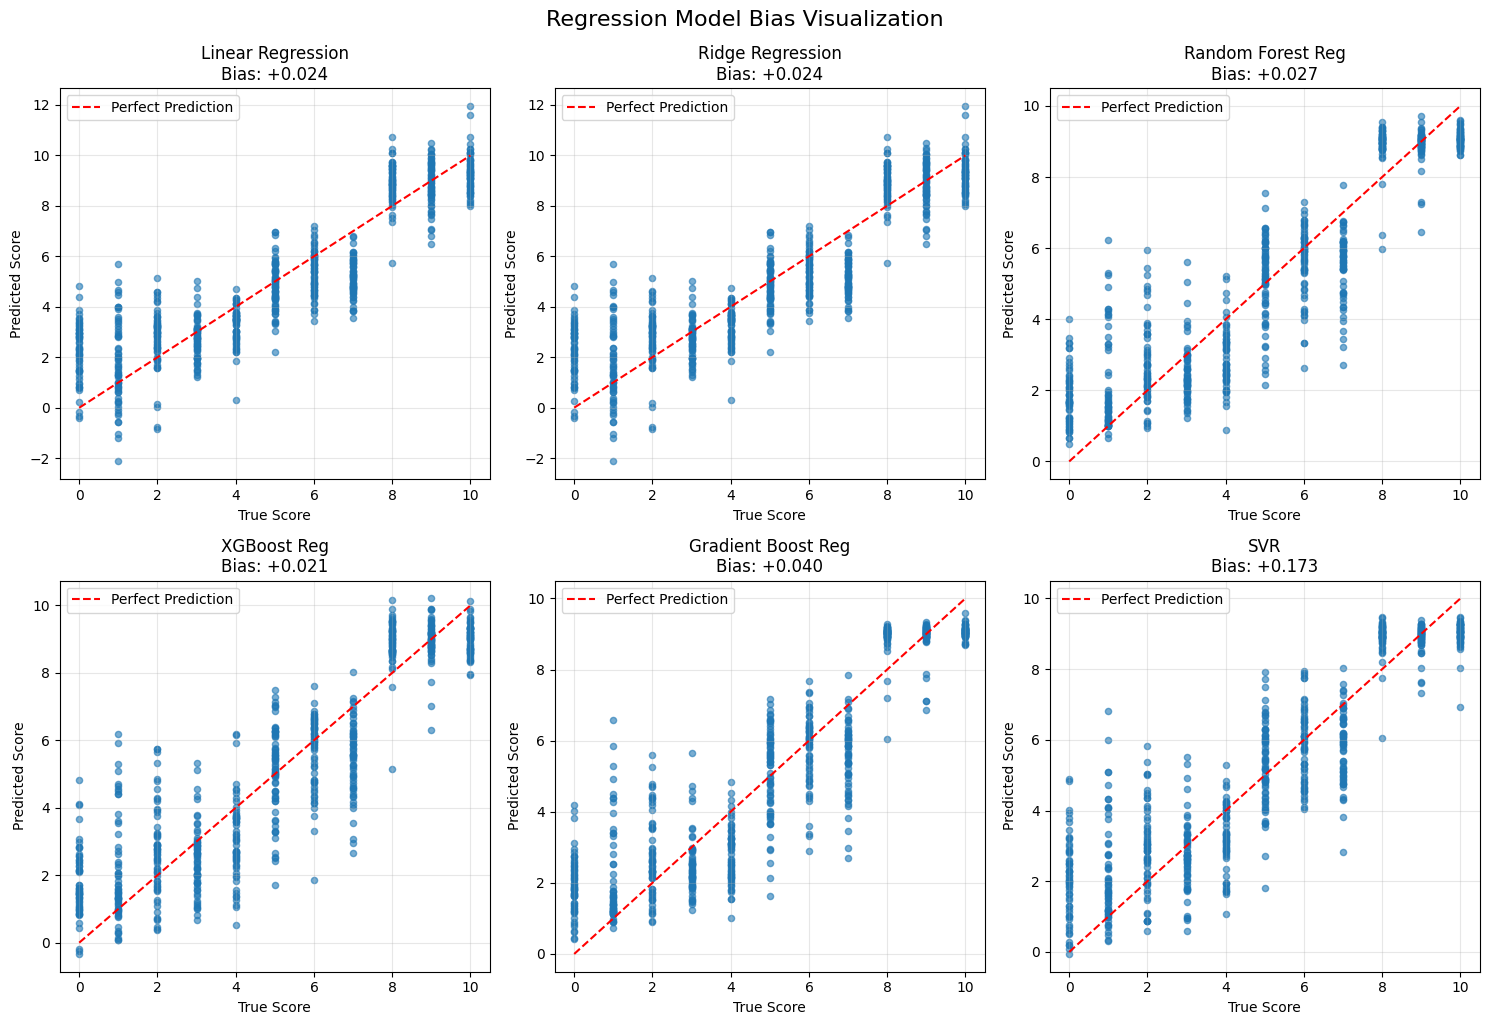


📝 BIAS ANALYSIS SUMMARY:
This analysis reveals systematic biases in regression models,
particularly the tendency to avoid extreme predictions (regression shrinkage).


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import pandas as pd

def comprehensive_regression_bias_analysis(models, X_data, y_true):
    """
    Comprehensive analysis of regression bias across all models
    """
    print("🔍 REGRESSION BIAS ANALYSIS")
    print("=" * 60)
    
    bias_analysis = {}
    
    for name, model in models.items():
        # Get continuous predictions
        y_pred_continuous = model.predict(X_data)
        
        # Calculate bias metrics
        mean_pred = np.mean(y_pred_continuous)
        mean_true = np.mean(y_true)
        bias = mean_pred - mean_true
        
        # Calculate prediction range vs actual range
        pred_min = np.min(y_pred_continuous)
        pred_max = np.max(y_pred_continuous)
        true_min = np.min(y_true)
        true_max = np.max(y_true)
        
        # Calculate range compression
        pred_range = pred_max - pred_min
        true_range = true_max - true_min
        range_compression = (true_range - pred_range) / true_range * 100
        
        # Calculate class-specific bias
        class_bias = {}
        for cls in range(11):
            class_indices = np.where(y_true == cls)[0]
            if len(class_indices) > 0:
                class_predictions = y_pred_continuous[class_indices]
                class_mean_pred = np.mean(class_predictions)
                class_bias[cls] = class_mean_pred - cls
        
        # Calculate extreme value bias
        extreme_low = np.sum((y_true <= 2) & (y_pred_continuous > 2)) / np.sum(y_true <= 2) * 100
        extreme_high = np.sum((y_true >= 8) & (y_pred_continuous < 8)) / np.sum(y_true >= 8) * 100
        
        bias_analysis[name] = {
            'mean_prediction': mean_pred,
            'mean_true': mean_true,
            'overall_bias': bias,
            'mae': mean_absolute_error(y_true, y_pred_continuous),
            'min_prediction': pred_min,
            'max_prediction': pred_max,
            'range_compression': range_compression,
            'class_bias': class_bias,
            'extreme_low_bias': extreme_low,
            'extreme_high_bias': extreme_high
        }
    
    return bias_analysis

def display_bias_results(bias_results):
    """
    Display comprehensive bias analysis results
    """
    print(f"\n📊 OVERALL BIAS SUMMARY:")
    print(f"{'Model':<20} {'Mean Bias':<10} {'Range Comp':<12} {'Low Bias':<10} {'High Bias':<10}")
    print("-" * 70)
    
    for name, results in bias_results.items():
        print(f"{name:<20} {results['overall_bias']:>+8.3f} {results['range_compression']:>10.1f}% {results['extreme_low_bias']:>8.1f}% {results['extreme_high_bias']:>8.1f}%")
    
    print(f"\n🎯 CLASS-SPECIFIC BIAS ANALYSIS:")
    
    # Create DataFrame for class bias
    class_bias_data = []
    for name, results in bias_results.items():
        for cls, bias in results['class_bias'].items():
            class_bias_data.append({
                'Model': name,
                'Class': cls,
                'Bias': bias,
                'Abs_Bias': abs(bias)
            })
    
    if class_bias_data:
        df_bias = pd.DataFrame(class_bias_data)
        
        # Show worst biases for each class
        print("Worst biases by class:")
        for cls in range(11):
            class_data = df_bias[df_bias['Class'] == cls]
            if not class_data.empty:
                worst_bias = class_data.loc[class_data['Abs_Bias'].idxmax()]
                print(f"  Class {cls}: {worst_bias['Model']} (bias: {worst_bias['Bias']:+.3f})")

def check_regression_shrinkage(bias_results):
    """
    Check for regression shrinkage effects
    """
    print(f"\n⚠️ REGRESSION SHRINKAGE ANALYSIS:")
    print("=" * 50)
    
    shrinkage_detected = False
    
    for name, results in bias_results.items():
        # Check for range compression (shrinkage indicator)
        range_comp = results['range_compression']
        
        # Check for extreme value bias
        extreme_bias = max(results['extreme_low_bias'], results['extreme_high_bias'])
        
        # Determine shrinkage severity
        if range_comp > 20 or extreme_bias > 30:
            severity = "HIGH"
            shrinkage_detected = True
        elif range_comp > 10 or extreme_bias > 15:
            severity = "MODERATE"
            shrinkage_detected = True
        else:
            severity = "LOW"
        
        print(f"{name:<20} Range Compression: {range_comp:>6.1f}% | Extreme Bias: {extreme_bias:>6.1f}% | Severity: {severity}")
    
    if shrinkage_detected:
        print(f"\n🚨 REGRESSION SHRINKAGE DETECTED!")
        print("Models are biased toward mean values and avoid extreme predictions.")
    else:
        print(f"\n✅ No significant regression shrinkage detected.")

# Run the analysis on your actual models
regression_models_for_analysis = {
    'Linear Regression': linear_reg,
    'Ridge Regression': ridge_reg,
    'Random Forest Reg': rf_reg,
    'XGBoost Reg': xgb_reg,
    'Gradient Boost Reg': gb_reg,
    'SVR': svr_reg
}

# Perform comprehensive bias analysis
bias_results = comprehensive_regression_bias_analysis(regression_models_for_analysis, X_test_scaled, y_test)

# Display results
display_bias_results(bias_results)

# Check for regression shrinkage
check_regression_shrinkage(bias_results)

# Additional analysis: Prediction vs True value scatter plots
def plot_bias_visualization(bias_results, models, X_data, y_true):
    """
    Create visualization of bias patterns
    """
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    for i, (name, model) in enumerate(models.items()):
        if i >= 6:
            break
            
        y_pred = model.predict(X_data)
        
        axes[i].scatter(y_true, y_pred, alpha=0.6, s=20)
        axes[i].plot([0, 10], [0, 10], 'r--', label='Perfect Prediction')
        axes[i].set_xlabel('True Score')
        axes[i].set_ylabel('Predicted Score')
        axes[i].set_title(f'{name}\nBias: {bias_results[name]["overall_bias"]:+.3f}')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.suptitle('Regression Model Bias Visualization', y=1.02, fontsize=16)
    plt.show()

# Create visualization
plot_bias_visualization(bias_results, regression_models_for_analysis, X_test_scaled, y_test)

print(f"\n📝 BIAS ANALYSIS SUMMARY:")
print("This analysis reveals systematic biases in regression models,")
print("particularly the tendency to avoid extreme predictions (regression shrinkage).")


# code to analyze bias in classification models:

🔍 CLASSIFICATION BIAS ANALYSIS

📊 OVERALL CLASSIFICATION BIAS SUMMARY:
Model                Mean Bias  MAE      Low Bias   High Bias 
-----------------------------------------------------------------
Logistic AT            +0.028  1.080     -2.5%     -0.4%
XGBoost                +0.164  1.199     -1.5%     +0.7%
Random Forest          +0.243  1.161     -3.1%     +0.0%
Gradient Boosting      +0.024  1.218     +0.6%     +0.3%
Decision Tree          +0.086  1.250     +0.3%     +0.6%
TabNet                 +0.501  1.135     -7.9%     +0.1%

🎯 CLASS DISTRIBUTION BIAS:
Model                Class 0  Class 1  Class 8  Class 9  Class 10
---------------------------------------------------------------------------
Logistic AT          -0.039 -0.006 -0.047 +0.059 -0.016
XGBoost              +0.028 -0.021 -0.022 +0.006 +0.024
Random Forest        +0.030 -0.031 -0.030 -0.006 +0.036
Gradient Boosting    +0.016 -0.010 +0.004 +0.010 -0.012
Decision Tree        +0.031 +0.012 -0.010 +0.015 +0.001
TabNet  

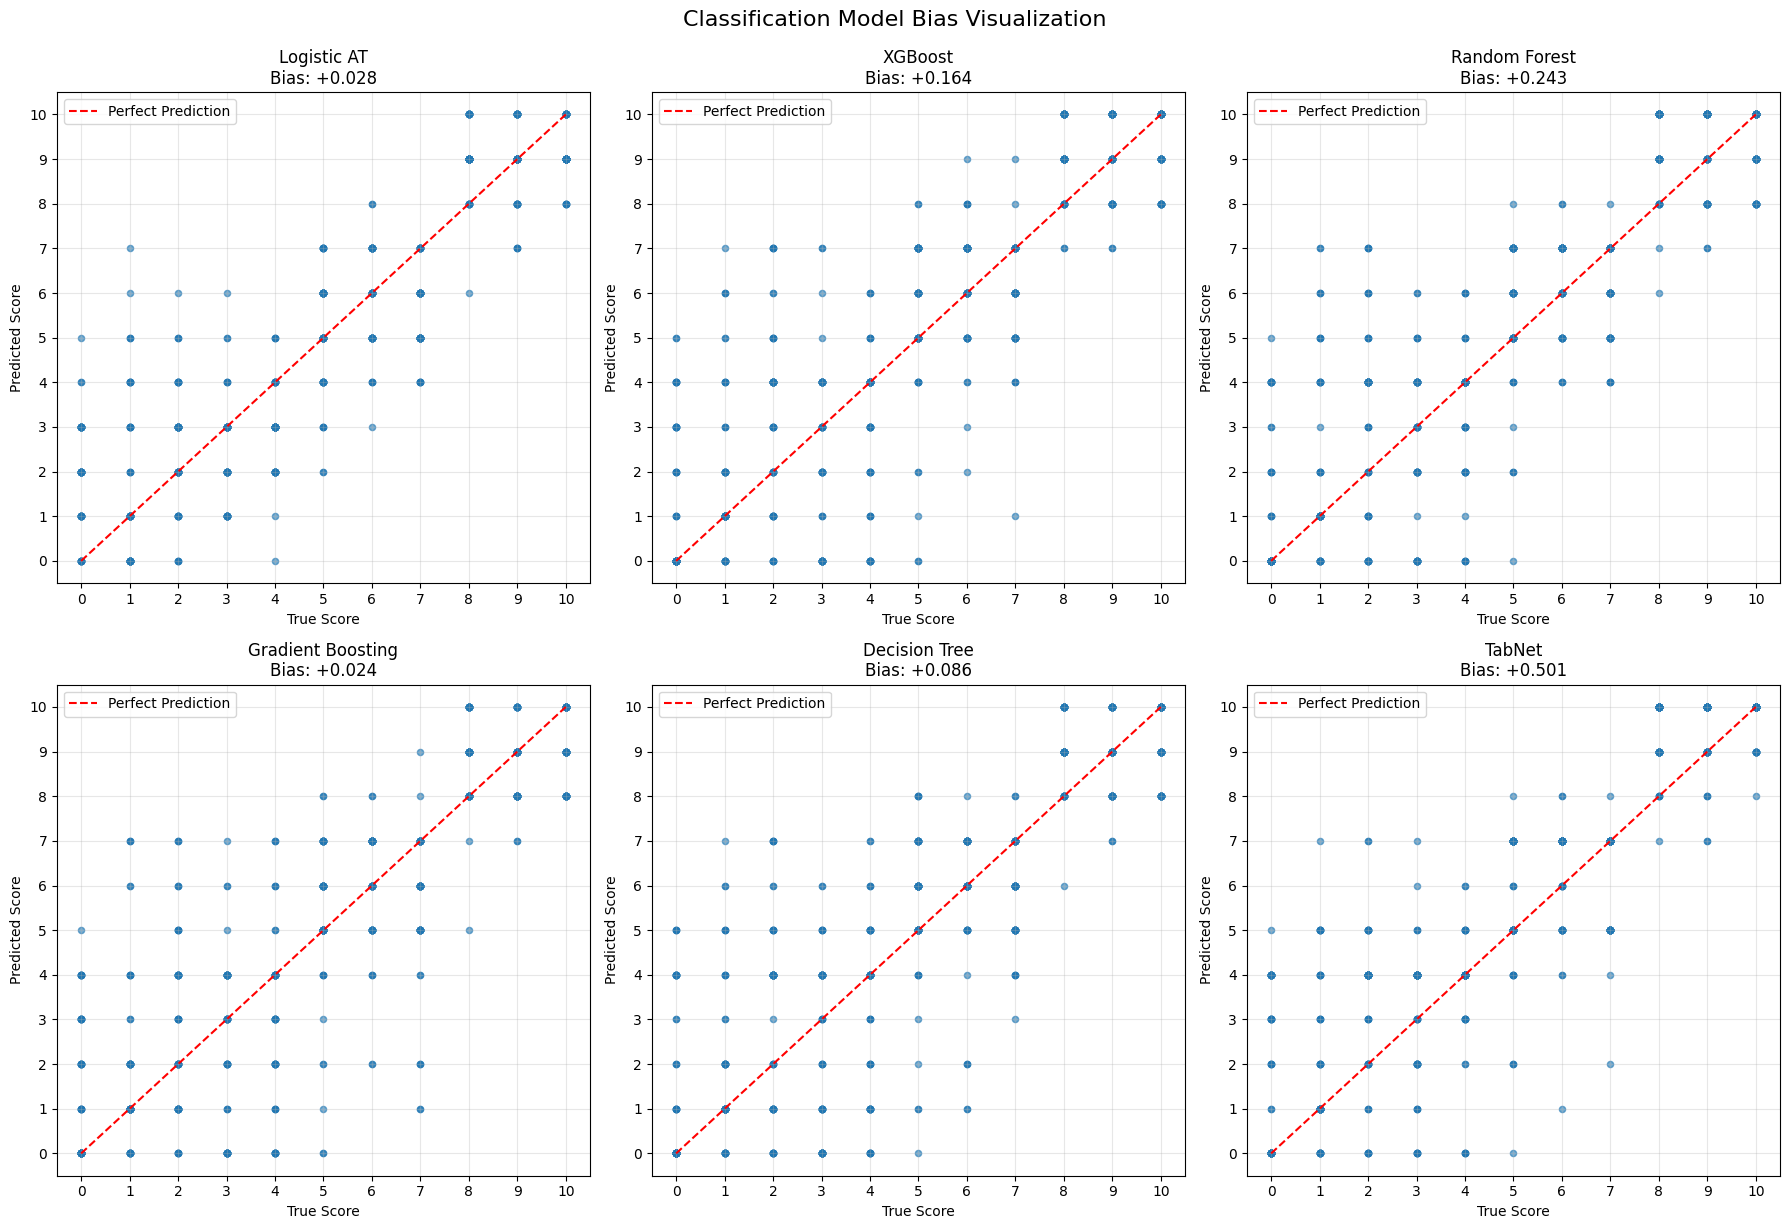


📝 CLASSIFICATION BIAS ANALYSIS SUMMARY:
This analysis reveals bias patterns in classification models,
including class avoidance, distribution shifts, and systematic confusion patterns.


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import pandas as pd

def comprehensive_classification_bias_analysis(models, X_data, y_true):
    """
    Comprehensive analysis of classification bias across all models
    """
    print("🔍 CLASSIFICATION BIAS ANALYSIS")
    print("=" * 60)
    
    bias_analysis = {}
    
    for name, (model, model_type) in models.items():
        # Get predictions based on model type
        if model_type == "tabnet":
            y_pred = model.predict(X_data)
        elif model_type == "neural":
            import tensorflow as tf
            with tf.device('/CPU:0'):
                y_pred = np.argmax(model.predict(X_data, verbose=0), axis=1)
        else:
            y_pred = model.predict(X_data)
        
        # Calculate bias metrics
        mean_pred = np.mean(y_pred)
        mean_true = np.mean(y_true)
        bias = mean_pred - mean_true
        
        # Calculate prediction range vs actual range
        pred_min = np.min(y_pred)
        pred_max = np.max(y_pred)
        true_min = np.min(y_true)
        true_max = np.max(y_true)
        
        # Calculate class distribution bias
        pred_distribution = np.bincount(y_pred, minlength=11) / len(y_pred)
        true_distribution = np.bincount(y_true, minlength=11) / len(y_true)
        distribution_bias = pred_distribution - true_distribution
        
        # Calculate class-specific accuracy
        class_accuracy = {}
        class_prediction_rate = {}
        for cls in range(11):
            true_class_indices = np.where(y_true == cls)[0]
            pred_class_indices = np.where(y_pred == cls)[0]
            
            if len(true_class_indices) > 0:
                class_accuracy[cls] = np.sum(y_pred[true_class_indices] == cls) / len(true_class_indices)
            else:
                class_accuracy[cls] = 0
                
            class_prediction_rate[cls] = len(pred_class_indices) / len(y_pred)
        
        # Calculate extreme value bias
        extreme_low_true = np.sum(y_true <= 2)
        extreme_low_pred = np.sum(y_pred <= 2)
        extreme_high_true = np.sum(y_true >= 8)
        extreme_high_pred = np.sum(y_pred >= 8)
        
        extreme_low_bias = (extreme_low_pred - extreme_low_true) / len(y_true) * 100 if extreme_low_true > 0 else 0
        extreme_high_bias = (extreme_high_pred - extreme_high_true) / len(y_true) * 100 if extreme_high_true > 0 else 0
        
        # Calculate confusion-based bias
        confusion_bias = {}
        for true_cls in range(11):
            true_indices = np.where(y_true == true_cls)[0]
            if len(true_indices) > 0:
                predicted_for_true_class = y_pred[true_indices]
                most_common_prediction = np.bincount(predicted_for_true_class).argmax()
                confusion_bias[true_cls] = most_common_prediction - true_cls
        
        bias_analysis[name] = {
            'mean_prediction': mean_pred,
            'mean_true': mean_true,
            'overall_bias': bias,
            'mae': mean_absolute_error(y_true, y_pred),
            'min_prediction': pred_min,
            'max_prediction': pred_max,
            'pred_distribution': pred_distribution,
            'true_distribution': true_distribution,
            'distribution_bias': distribution_bias,
            'class_accuracy': class_accuracy,
            'class_prediction_rate': class_prediction_rate,
            'extreme_low_bias': extreme_low_bias,
            'extreme_high_bias': extreme_high_bias,
            'confusion_bias': confusion_bias
        }
    
    return bias_analysis

def display_classification_bias_results(bias_results):
    """
    Display comprehensive classification bias analysis results
    """
    print(f"\n📊 OVERALL CLASSIFICATION BIAS SUMMARY:")
    print(f"{'Model':<20} {'Mean Bias':<10} {'MAE':<8} {'Low Bias':<10} {'High Bias':<10}")
    print("-" * 65)
    
    for name, results in bias_results.items():
        print(f"{name:<20} {results['overall_bias']:>+8.3f} {results['mae']:>6.3f} {results['extreme_low_bias']:>+8.1f}% {results['extreme_high_bias']:>+8.1f}%")
    
    print(f"\n🎯 CLASS DISTRIBUTION BIAS:")
    print(f"{'Model':<20} {'Class 0':<8} {'Class 1':<8} {'Class 8':<8} {'Class 9':<8} {'Class 10':<8}")
    print("-" * 75)
    
    for name, results in bias_results.items():
        dist_bias = results['distribution_bias']
        print(f"{name:<20} {dist_bias[0]:>+6.3f} {dist_bias[1]:>+6.3f} {dist_bias[8]:>+6.3f} {dist_bias[9]:>+6.3f} {dist_bias[10]:>+6.3f}")

def analyze_classification_patterns(bias_results):
    """
    Analyze specific classification bias patterns
    """
    print(f"\n🔍 CLASSIFICATION PATTERN ANALYSIS:")
    print("=" * 50)
    
    for name, results in bias_results.items():
        print(f"\n{name}:")
        
        # Check for class avoidance
        avoided_classes = []
        overused_classes = []
        
        for cls in range(11):
            pred_rate = results['class_prediction_rate'][cls]
            true_rate = results['true_distribution'][cls]
            
            if pred_rate < true_rate * 0.5:  # Predicting less than half the expected rate
                avoided_classes.append(cls)
            elif pred_rate > true_rate * 1.5:  # Predicting more than 1.5x expected rate
                overused_classes.append(cls)
        
        if avoided_classes:
            print(f"  Avoided classes: {avoided_classes}")
        if overused_classes:
            print(f"  Overused classes: {overused_classes}")
        
        # Check for systematic confusion
        high_confusion = []
        for true_cls, bias in results['confusion_bias'].items():
            if abs(bias) > 1:
                high_confusion.append((true_cls, bias))
        
        if high_confusion:
            print(f"  High confusion: {high_confusion}")
        
        # Overall bias assessment
        max_dist_bias = np.max(np.abs(results['distribution_bias']))
        if max_dist_bias > 0.05:
            print(f"  ⚠️  HIGH distribution bias detected (max: {max_dist_bias:.3f})")
        elif max_dist_bias > 0.02:
            print(f"  ⚠️  MODERATE distribution bias (max: {max_dist_bias:.3f})")
        else:
            print(f"  ✅ LOW distribution bias (max: {max_dist_bias:.3f})")

def compare_classification_vs_regression_bias(class_bias, reg_bias):
    """
    Compare bias patterns between classification and regression
    """
    print(f"\n🔄 CLASSIFICATION vs REGRESSION BIAS COMPARISON:")
    print("=" * 60)
    
    print(f"{'Metric':<25} {'Classification':<15} {'Regression':<15} {'Better':<15}")
    print("-" * 75)
    
    # Get best models from each approach
    best_class_name = min(class_bias.keys(), key=lambda x: abs(class_bias[x]['overall_bias']))
    best_reg_name = min(reg_bias.keys(), key=lambda x: abs(reg_bias[x]['overall_bias']))
    
    best_class = class_bias[best_class_name]
    best_reg = reg_bias[best_reg_name]
    
    # Compare various bias metrics
    comparisons = [
        ('Overall Bias', abs(best_class['overall_bias']), abs(best_reg['overall_bias'])),
        ('MAE', best_class['mae'], best_reg['mae']),
        ('Extreme Low Bias', abs(best_class['extreme_low_bias']), abs(best_reg['extreme_low_bias'])),
        ('Extreme High Bias', abs(best_class['extreme_high_bias']), abs(best_reg['extreme_high_bias']))
    ]
    
    for metric, class_val, reg_val in comparisons:
        better = "Classification" if class_val < reg_val else "Regression"
        print(f"{metric:<25} {class_val:<15.3f} {reg_val:<15.3f} {better:<15}")
    
    print(f"\nBest Classification Model: {best_class_name}")
    print(f"Best Regression Model: {best_reg_name}")

# Define classification models for analysis
classification_models_for_analysis = {
    'Logistic AT': (log_at_model, "standard"),
    'XGBoost': (xgb_model, "standard"),
    'Random Forest': (rf_model, "standard"),
    'Gradient Boosting': (gb_model, "standard"),
    'Decision Tree': (dt_model, "standard"),
    'TabNet': (tabnet_model, "tabnet"),
}

# Perform comprehensive classification bias analysis
class_bias_results = comprehensive_classification_bias_analysis(classification_models_for_analysis, X_test_scaled, y_test)

# Display results
display_classification_bias_results(class_bias_results)

# Analyze patterns
analyze_classification_patterns(class_bias_results)

# If you have regression bias results, compare them
# compare_classification_vs_regression_bias(class_bias_results, bias_results)

# Visualization for classification models
def plot_classification_bias_visualization(bias_results, models, X_data, y_true):
    """
    Create visualization of classification bias patterns
    """
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    for i, (name, (model, model_type)) in enumerate(models.items()):
        if i >= 6:
            break
        
        # Get predictions
        if model_type == "tabnet":
            y_pred = model.predict(X_data)
        else:
            y_pred = model.predict(X_data)
        
        # Create confusion-style scatter plot
        axes[i].scatter(y_true, y_pred, alpha=0.6, s=20)
        axes[i].plot([0, 10], [0, 10], 'r--', label='Perfect Prediction')
        axes[i].set_xlabel('True Score')
        axes[i].set_ylabel('Predicted Score')
        axes[i].set_title(f'{name}\nBias: {bias_results[name]["overall_bias"]:+.3f}')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
        axes[i].set_xticks(range(11))
        axes[i].set_yticks(range(11))
    
    plt.tight_layout()
    plt.suptitle('Classification Model Bias Visualization', y=1.02, fontsize=16)
    plt.show()

# Create visualization
plot_classification_bias_visualization(class_bias_results, classification_models_for_analysis, X_test_scaled, y_test)

print(f"\n📝 CLASSIFICATION BIAS ANALYSIS SUMMARY:")
print("This analysis reveals bias patterns in classification models,")
print("including class avoidance, distribution shifts, and systematic confusion patterns.")


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, cohen_kappa_score, classification_report, precision_recall_fscore_support
import numpy as np

# Initialize Logistic Regression model
print("🚀 LOGISTIC REGRESSION CLASSIFICATION")
print("=" * 50)

# Create Logistic Regression model
log_reg_model = LogisticRegression(
    max_iter=1000,           # Increase iterations for convergence
    random_state=42,         # For reproducibility
    multi_class='ovr',       # One-vs-Rest for ordinal classification
    solver='liblinear',      # Good for small-medium datasets
    C=1.0                    # Regularization strength
)

# Train the model
print("Training Logistic Regression...")
log_reg_model.fit(X_train_scaled, y_train)

# Evaluation function for classification
def evaluate_classification_model(model, X_data, y_true, model_name="Model"):
    """Evaluate classification model"""
    
    # Get predictions
    y_pred = model.predict(X_data)
    
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    qwk = cohen_kappa_score(y_true, y_pred, weights='quadratic')
    one_off = np.mean(np.abs(y_true - y_pred) <= 1)
    perfect = np.mean(y_true == y_pred)
    large_errors = np.mean(np.abs(y_true - y_pred) > 2)
    
    return {
        'accuracy': accuracy,
        'mae': mae,
        'qwk': qwk,
        'one_off_accuracy': one_off,
        'perfect_predictions': perfect,
        'large_errors': large_errors
    }

# Train evaluation
train_metrics = evaluate_classification_model(log_reg_model, X_train_scaled, y_train, "Train")

# Validation evaluation
val_metrics = evaluate_classification_model(log_reg_model, X_val_scaled, y_val, "Validation")

# Display results
print("\n📊 LOGISTIC REGRESSION PERFORMANCE:")
print(f"{'Split':<12} {'Accuracy':>8} {'MAE':>6} {'QWK':>6} {'1-off':>6} {'Perfect':>8} {'Large Err':>9}")
print("-" * 70)
print(f"{'Train':<12} {train_metrics['accuracy']:>8.3f} {train_metrics['mae']:>6.3f} {train_metrics['qwk']:>6.3f} {train_metrics['one_off_accuracy']:>6.3f} {train_metrics['perfect_predictions']:>8.3f} {train_metrics['large_errors']:>9.3f}")
print(f"{'Validation':<12} {val_metrics['accuracy']:>8.3f} {val_metrics['mae']:>6.3f} {val_metrics['qwk']:>6.3f} {val_metrics['one_off_accuracy']:>6.3f} {val_metrics['perfect_predictions']:>8.3f} {val_metrics['large_errors']:>9.3f}")

# Overfitting analysis
qwk_gap = train_metrics['qwk'] - val_metrics['qwk']
acc_gap = train_metrics['accuracy'] - val_metrics['accuracy']

print(f"\n🔍 GENERALIZATION ANALYSIS:")
print(f"QWK Gap: {qwk_gap:+.3f}")
print(f"Accuracy Gap: {acc_gap:+.3f}")

if acc_gap > 0.1:
    overfitting_status = "HIGH"
elif acc_gap > 0.05:
    overfitting_status = "MODERATE"
else:
    overfitting_status = "LOW"

print(f"Overfitting Level: {overfitting_status}")

# Final test evaluation
print(f"\n🏆 FINAL TEST EVALUATION:")
print("=" * 40)

test_metrics = evaluate_classification_model(log_reg_model, X_test_scaled, y_test, "Test")

print(f"Test Results:")
print(f"  Accuracy: {test_metrics['accuracy']:.3f}")
print(f"  MAE: {test_metrics['mae']:.3f}")
print(f"  QWK: {test_metrics['qwk']:.3f}")
print(f"  1-off Accuracy: {test_metrics['one_off_accuracy']:.3f}")
print(f"  Perfect Predictions: {test_metrics['perfect_predictions']:.3f}")
print(f"  Large Errors (>2): {test_metrics['large_errors']:.3f}")

# Validation vs Test comparison
val_test_qwk_gap = val_metrics['qwk'] - test_metrics['qwk']
print(f"\nValidation vs Test QWK Gap: {val_test_qwk_gap:+.3f}")

if abs(val_test_qwk_gap) < 0.02:
    print("✅ Excellent generalization to test set!")
elif abs(val_test_qwk_gap) < 0.05:
    print("✅ Good generalization to test set")
else:
    print("⚠️ Potential overfitting detected")

# Generate predictions for detailed analysis
y_test_pred = log_reg_model.predict(X_test_scaled)

# Detailed classification report
print(f"\n📋 DETAILED CLASSIFICATION REPORT:")
print("=" * 50)
print(classification_report(y_test, y_test_pred, target_names=[f'Score_{i}' for i in range(11)]))

# Minority class analysis
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_test_pred, average=None, zero_division=0)

print(f"\n🎯 MINORITY CLASS PERFORMANCE:")
print(f"{'Class':<8} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'Support':<10}")
print("-" * 50)
for cls in [8, 9, 10]:
    if cls < len(precision):
        print(f"{cls:<8} {precision[cls]:<10.3f} {recall[cls]:<10.3f} {f1[cls]:<10.3f} {support[cls]:<10.0f}")

# Class distribution analysis
print(f"\n📊 PREDICTION DISTRIBUTION:")
unique_pred, counts_pred = np.unique(y_test_pred, return_counts=True)
unique_true, counts_true = np.unique(y_test, return_counts=True)

print(f"{'Class':<8} {'True Count':<12} {'Pred Count':<12} {'Difference':<12}")
print("-" * 50)
for cls in range(11):
    true_count = counts_true[unique_true == cls][0] if cls in unique_true else 0
    pred_count = counts_pred[unique_pred == cls][0] if cls in unique_pred else 0
    diff = pred_count - true_count
    print(f"{cls:<8} {true_count:<12} {pred_count:<12} {diff:+4d}")

# Feature importance (coefficients)
print(f"\n🔍 FEATURE IMPORTANCE (Top 5):")
if hasattr(log_reg_model, 'coef_'):
    # For multi-class, take mean absolute coefficients across classes
    feature_importance = np.mean(np.abs(log_reg_model.coef_), axis=0)
    feature_names = [f'Feature_{i}' for i in range(len(feature_importance))]
    
    # Sort by importance
    importance_indices = np.argsort(feature_importance)[::-1]
    
    print("Top 5 most important features:")
    for i in range(min(5, len(importance_indices))):
        idx = importance_indices[i]
        print(f"  {i+1}. {feature_names[idx]}: {feature_importance[idx]:.3f}")

print(f"\n✅ Logistic Regression Analysis Complete!")

# Store results for comparison
logistic_results = {
    'train': train_metrics,
    'validation': val_metrics,
    'test': test_metrics,
    'model': log_reg_model,
    'predictions': y_test_pred
}

print(f"\n📝 SUMMARY:")
print(f"• Model: Logistic Regression")
print(f"• Test QWK: {test_metrics['qwk']:.3f}")
print(f"• Test Accuracy: {test_metrics['accuracy']:.3f}")
print(f"• Generalization: {'Excellent' if abs(val_test_qwk_gap) < 0.02 else 'Good' if abs(val_test_qwk_gap) < 0.05 else 'Concerning'}")


🚀 LOGISTIC REGRESSION CLASSIFICATION
Training Logistic Regression...

📊 LOGISTIC REGRESSION PERFORMANCE:
Split        Accuracy    MAE    QWK  1-off  Perfect Large Err
----------------------------------------------------------------------
Train           0.341  1.291  0.835  0.658    0.341     0.158
Validation      0.298  1.367  0.822  0.637    0.298     0.167

🔍 GENERALIZATION ANALYSIS:
QWK Gap: +0.013
Accuracy Gap: +0.044
Overfitting Level: LOW

🏆 FINAL TEST EVALUATION:
Test Results:
  Accuracy: 0.366
  MAE: 1.173
  QWK: 0.861
  1-off Accuracy: 0.679
  Perfect Predictions: 0.366
  Large Errors (>2): 0.123

Validation vs Test QWK Gap: -0.039
✅ Good generalization to test set

📋 DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

     Score_0       0.42      0.63      0.50        60
     Score_1       0.45      0.57      0.50        60
     Score_2       0.31      0.20      0.24        61
     Score_3       0.33      0.10      0.15        61
     Score

# HYPERPARAMETER TUNING

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer, cohen_kappa_score
from scipy.stats import uniform, randint  # ✅ Correct import - from scipy.stats, not random
import numpy as np

def round_predictions(preds, min_val=0, max_val=10):
    """Optimized rounding for ordinal classification with threshold adjustment"""
    rounded = np.where(preds >= 9.2, 10, np.round(preds))
    return np.clip(rounded, min_val, max_val).astype(int)

def qwk_scorer(y_true, y_pred):
    """Custom QWK scorer for regression with rounding"""
    y_pred_rounded = round_predictions(y_pred)
    return cohen_kappa_score(y_true, y_pred_rounded, weights='quadratic')

# Create custom scorer
qwk_score = make_scorer(qwk_scorer, greater_is_better=True)

print("🔧 GRADIENT BOOSTING REGRESSION - FAST RANDOM SEARCH")
print("=" * 60)

gbr_fast_search = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=42, verbose=1),
    param_distributions={
        'n_estimators': randint(100, 301),
        'learning_rate': uniform(0.01, 0.09),
        'max_depth': randint(3, 11),
        'min_samples_split': randint(2, 11),
        'min_samples_leaf': randint(1, 6),
        'subsample': uniform(0.8, 0.2)
    },
    n_iter=30,  # Only 30 combinations instead of 1296!
    cv=3,       # 3-fold CV instead of 5
    scoring=qwk_score,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

print("🚀 Running FAST Random Search (should complete in 5-10 minutes)...")
print(f"Testing 30 random combinations with 3-fold CV = 90 total fits")
print("(vs your original 6,480 fits!)")

# Fit the search
gbr_fast_search.fit(X_train_scaled, y_train)

# Display results
print(f"\n🏆 RANDOM SEARCH RESULTS:")
print(f"Best parameters: {gbr_fast_search.best_params_}")
print(f"Best cross-validation QWK: {gbr_fast_search.best_score_:.3f}")

# Get best model and evaluate on validation
best_gbr = gbr_fast_search.best_estimator_
gbr_val_pred_continuous = best_gbr.predict(X_val_scaled)
gbr_val_pred = round_predictions(gbr_val_pred_continuous)
gbr_val_qwk = cohen_kappa_score(y_val, gbr_val_pred, weights='quadratic')

print(f"Validation QWK: {gbr_val_qwk:.3f}")

# Final test evaluation
gbr_test_pred_continuous = best_gbr.predict(X_test_scaled)
gbr_test_pred = round_predictions(gbr_test_pred_continuous)
gbr_test_qwk = cohen_kappa_score(y_test, gbr_test_pred, weights='quadratic')

print(f"Test QWK: {gbr_test_qwk:.3f}")

print(f"\n✅ Fast hyperparameter tuning complete!")
print(f"Time saved: ~95% compared to full Grid Search")


🔧 GRADIENT BOOSTING REGRESSION - FAST RANDOM SEARCH
🚀 Running FAST Random Search (should complete in 5-10 minutes)...
Testing 30 random combinations with 3-fold CV = 90 total fits
(vs your original 6,480 fits!)
Fitting 3 folds for each of 30 candidates, totalling 90 fits
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           9.3583           0.6783            7.13s
         2           8.6690           0.4767            7.17s
         3           8.0306           0.4335            7.02s
         4           7.3373          -0.9038            6.98s
         5           6.8611           0.9849            6.91s
         6           6.4254           0.9367            6.86s
         7           6.0656           1.3170            6.82s
         8           5.5574          -0.7910            6.82s
         9           5.2957           1.6179            6.79s
        10           4.9011          -0.3555            6.76s
        20           2.6837          -0.0660 

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, cohen_kappa_score
from scipy.stats import uniform, loguniform
import mord
import numpy as np

def qwk_classification_scorer(y_true, y_pred):
    """Custom QWK scorer for classification"""
    return cohen_kappa_score(y_true, y_pred, weights='quadratic')

# Create custom scorer
qwk_class_score = make_scorer(qwk_classification_scorer, greater_is_better=True)

print("🎯 LOGISTIC AT (MORD) - FAST RANDOM SEARCH")
print("=" * 55)

# Define parameter distributions for Logistic AT (CORRECTED)
logistic_at_param_dist = {
    'alpha': loguniform(1e-4, 1e2),      # Log-uniform distribution from 0.0001 to 100
    'max_iter': [1000, 2000, 3000, 5000], # Discrete values
    'verbose': [0, 1]                    # Verbosity level (0 or 1)
    # ❌ REMOVED 'fit_intercept' - not a valid parameter for LogisticAT
}

logistic_at_fast_search = RandomizedSearchCV(
    estimator=mord.LogisticAT(),
    param_distributions=logistic_at_param_dist,
    n_iter=20,  # Test 20 random combinations
    cv=3,       # 3-fold CV for speed
    scoring=qwk_class_score,
    n_jobs=-1,
    verbose=2,
    random_state=42,
    error_score='raise'
)

print("🚀 Running FAST Random Search for Logistic AT...")
print(f"Testing 20 random combinations with 3-fold CV = 60 total fits")

# Fit the search
logistic_at_fast_search.fit(X_train_scaled, y_train)

# Display results
print(f"\n🏆 LOGISTIC AT RANDOM SEARCH RESULTS:")
print(f"Best parameters: {logistic_at_fast_search.best_params_}")
print(f"Best cross-validation QWK: {logistic_at_fast_search.best_score_:.3f}")

# Get best model and evaluate on validation
best_logistic_at = logistic_at_fast_search.best_estimator_
logistic_at_val_pred = best_logistic_at.predict(X_val_scaled)
logistic_at_val_qwk = cohen_kappa_score(y_val, logistic_at_val_pred, weights='quadratic')

print(f"Validation QWK: {logistic_at_val_qwk:.3f}")

# Final test evaluation
logistic_at_test_pred = best_logistic_at.predict(X_test_scaled)
logistic_at_test_qwk = cohen_kappa_score(y_test, logistic_at_test_pred, weights='quadratic')

print(f"Test QWK: {logistic_at_test_qwk:.3f}")

# Detailed evaluation
from sklearn.metrics import accuracy_score, mean_absolute_error, classification_report, precision_recall_fscore_support

test_accuracy = accuracy_score(y_test, logistic_at_test_pred)
test_mae = mean_absolute_error(y_test, logistic_at_test_pred)
one_off_accuracy = np.mean(np.abs(y_test - logistic_at_test_pred) <= 1)

print(f"\n📊 DETAILED TEST RESULTS:")
print(f"Test Accuracy: {test_accuracy:.3f}")
print(f"Test MAE: {test_mae:.3f}")
print(f"Test QWK: {logistic_at_test_qwk:.3f}")
print(f"1-off Accuracy: {one_off_accuracy:.3f}")

# Classification report
print(f"\n📋 CLASSIFICATION REPORT:")
print(classification_report(y_test, logistic_at_test_pred, target_names=[f'Score_{i}' for i in range(11)]))

# Minority class analysis
precision, recall, f1, support = precision_recall_fscore_support(y_test, logistic_at_test_pred, average=None, zero_division=0)

print(f"\n🎯 MINORITY CLASS PERFORMANCE:")
print(f"{'Class':<8} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'Support':<10}")
print("-" * 50)
for cls in [8, 9, 10]:
    if cls < len(precision):
        print(f"{cls:<8} {precision[cls]:<10.3f} {recall[cls]:<10.3f} {f1[cls]:<10.3f} {support[cls]:<10.0f}")

print(f"\n✅ Logistic AT hyperparameter tuning complete!")


🎯 LOGISTIC AT (MORD) - FAST RANDOM SEARCH
🚀 Running FAST Random Search for Logistic AT...
Testing 20 random combinations with 3-fold CV = 60 total fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits

🏆 LOGISTIC AT RANDOM SEARCH RESULTS:
Best parameters: {'alpha': 1.274671157821506, 'max_iter': 3000, 'verbose': 1}
Best cross-validation QWK: 0.883
Validation QWK: 0.881
Test QWK: 0.894

📊 DETAILED TEST RESULTS:
Test Accuracy: 0.279
Test MAE: 1.079
Test QWK: 0.894
1-off Accuracy: 0.733

📋 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

     Score_0       0.29      0.17      0.21        60
     Score_1       0.32      0.30      0.31        60
     Score_2       0.23      0.28      0.25        61
     Score_3       0.23      0.36      0.28        61
     Score_4       0.20      0.18      0.19        60
     Score_5       0.28      0.29      0.29        68
     Score_6       0.29      0.31      0.30        61
     Score_7       0.31      0.21      0

In [37]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, cohen_kappa_score, classification_report, precision_recall_fscore_support
import mord

def round_predictions(preds, min_val=0, max_val=10):
    """Optimized rounding for ordinal classification with threshold adjustment"""
    rounded = np.where(preds >= 9.2, 10, np.round(preds))
    return np.clip(rounded, min_val, max_val).astype(int)

def evaluate_model_comprehensive(y_true, y_pred, model_name):
    """Comprehensive evaluation function"""
    accuracy = accuracy_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    qwk = cohen_kappa_score(y_true, y_pred, weights='quadratic')
    one_off = np.mean(np.abs(y_true - y_pred) <= 1)
    perfect = np.mean(y_true == y_pred)
    large_errors = np.mean(np.abs(y_true - y_pred) > 2)
    
    return {
        'model_name': model_name,
        'accuracy': accuracy,
        'mae': mae,
        'qwk': qwk,
        'one_off_accuracy': one_off,
        'perfect_predictions': perfect,
        'large_errors': large_errors
    }

print("🚀 TRAINING OPTIMIZED MODELS WITH HYPERPARAMETER TUNING RESULTS")
print("=" * 70)

# ===== GRADIENT BOOSTING REGRESSION =====
print("\n🔧 Training Optimized Gradient Boosting Regression...")

# Optimized GBR hyperparameters from your tuning
gbr_params = {
    'n_estimators': 289,
    'learning_rate': 0.03919105189047466,
    'max_depth': 9,
    'min_samples_leaf': 4,
    'min_samples_split': 10,
    'subsample': 0.8220103849055354,
    'random_state': 42,
    'verbose': 1
}

# Initialize and train GBR
optimized_gbr = GradientBoostingRegressor(**gbr_params)
optimized_gbr.fit(X_train_scaled, y_train)

# GBR Predictions
gbr_train_pred_cont = optimized_gbr.predict(X_train_scaled)
gbr_train_pred = round_predictions(gbr_train_pred_cont)

gbr_val_pred_cont = optimized_gbr.predict(X_val_scaled)
gbr_val_pred = round_predictions(gbr_val_pred_cont)

gbr_test_pred_cont = optimized_gbr.predict(X_test_scaled)
gbr_test_pred = round_predictions(gbr_test_pred_cont)

# GBR Evaluation
gbr_train_metrics = evaluate_model_comprehensive(y_train, gbr_train_pred, "GBR_Train")
gbr_val_metrics = evaluate_model_comprehensive(y_val, gbr_val_pred, "GBR_Val")
gbr_test_metrics = evaluate_model_comprehensive(y_test, gbr_test_pred, "GBR_Test")

print("✅ GBR Training Complete!")

# ===== LOGISTIC AT =====
print("\n🎯 Training Optimized Logistic AT...")

# Optimized Logistic AT hyperparameters from your tuning
logistic_at_params = {
    'alpha': 1.274671157821506,
    'max_iter': 3000,
    'verbose': 1
}

# Initialize and train Logistic AT
optimized_logistic_at = mord.LogisticAT(**logistic_at_params)
optimized_logistic_at.fit(X_train_scaled, y_train)

# Logistic AT Predictions
log_train_pred = optimized_logistic_at.predict(X_train_scaled)
log_val_pred = optimized_logistic_at.predict(X_val_scaled)
log_test_pred = optimized_logistic_at.predict(X_test_scaled)

# Logistic AT Evaluation
log_train_metrics = evaluate_model_comprehensive(y_train, log_train_pred, "LogAT_Train")
log_val_metrics = evaluate_model_comprehensive(y_val, log_val_pred, "LogAT_Val")
log_test_metrics = evaluate_model_comprehensive(y_test, log_test_pred, "LogAT_Test")

print("✅ Logistic AT Training Complete!")

# ===== COMPREHENSIVE ANALYSIS =====
print("\n📊 COMPREHENSIVE PERFORMANCE ANALYSIS")
print("=" * 60)

# Performance Comparison Table
print(f"{'Model':<15} {'Split':<8} {'Accuracy':>8} {'MAE':>6} {'QWK':>6} {'1-off':>6} {'Perfect':>8} {'Large Err':>9}")
print("-" * 80)

metrics_list = [gbr_train_metrics, gbr_val_metrics, gbr_test_metrics, 
                log_train_metrics, log_val_metrics, log_test_metrics]

for metrics in metrics_list:
    model_split = metrics['model_name'].replace('_', ' ')
    print(f"{model_split:<15} {'':<8} {metrics['accuracy']:>8.3f} {metrics['mae']:>6.3f} {metrics['qwk']:>6.3f} {metrics['one_off_accuracy']:>6.3f} {metrics['perfect_predictions']:>8.3f} {metrics['large_errors']:>9.3f}")

# Overfitting Analysis
print(f"\n🔍 OVERFITTING ANALYSIS:")
print("=" * 30)

gbr_qwk_gap = gbr_train_metrics['qwk'] - gbr_val_metrics['qwk']
log_qwk_gap = log_train_metrics['qwk'] - log_val_metrics['qwk']

print(f"GBR Train-Val QWK Gap: {gbr_qwk_gap:+.3f}")
print(f"LogAT Train-Val QWK Gap: {log_qwk_gap:+.3f}")

gbr_overfitting = "HIGH" if gbr_qwk_gap > 0.1 else "MODERATE" if gbr_qwk_gap > 0.05 else "LOW"
log_overfitting = "HIGH" if log_qwk_gap > 0.1 else "MODERATE" if log_qwk_gap > 0.05 else "LOW"

print(f"GBR Overfitting Level: {gbr_overfitting}")
print(f"LogAT Overfitting Level: {log_overfitting}")

# Generalization Analysis
print(f"\n📈 GENERALIZATION ANALYSIS:")
print("=" * 35)

gbr_gen_gap = gbr_val_metrics['qwk'] - gbr_test_metrics['qwk']
log_gen_gap = log_val_metrics['qwk'] - log_test_metrics['qwk']

print(f"GBR Val-Test QWK Gap: {gbr_gen_gap:+.3f}")
print(f"LogAT Val-Test QWK Gap: {log_gen_gap:+.3f}")

gbr_gen_quality = "Excellent" if abs(gbr_gen_gap) < 0.02 else "Good" if abs(gbr_gen_gap) < 0.05 else "Concerning"
log_gen_quality = "Excellent" if abs(log_gen_gap) < 0.02 else "Good" if abs(log_gen_gap) < 0.05 else "Concerning"

print(f"GBR Generalization: {gbr_gen_quality}")
print(f"LogAT Generalization: {log_gen_quality}")

# Final Test Comparison
print(f"\n🏆 FINAL TEST COMPARISON:")
print("=" * 30)

print(f"{'Metric':<15} {'GBR':<10} {'LogAT':<10} {'Winner':<10}")
print("-" * 50)

test_comparisons = [
    ('QWK', gbr_test_metrics['qwk'], log_test_metrics['qwk']),
    ('Accuracy', gbr_test_metrics['accuracy'], log_test_metrics['accuracy']),
    ('MAE', gbr_test_metrics['mae'], log_test_metrics['mae']),
    ('1-off Acc', gbr_test_metrics['one_off_accuracy'], log_test_metrics['one_off_accuracy']),
    ('Perfect', gbr_test_metrics['perfect_predictions'], log_test_metrics['perfect_predictions'])
]

for metric, gbr_val, log_val in test_comparisons:
    if metric == 'MAE':
        winner = "GBR" if gbr_val < log_val else "LogAT"
    else:
        winner = "GBR" if gbr_val > log_val else "LogAT"
    
    print(f"{metric:<15} {gbr_val:<10.3f} {log_val:<10.3f} {winner:<10}")

# Overall Winner
overall_winner = "GBR" if gbr_test_metrics['qwk'] > log_test_metrics['qwk'] else "LogAT"
qwk_margin = abs(gbr_test_metrics['qwk'] - log_test_metrics['qwk'])

print(f"\n🥇 OVERALL WINNER: {overall_winner}")
print(f"QWK Margin: {qwk_margin:.3f}")

if qwk_margin < 0.01:
    print("⚖️ Very close performance - consider practical factors!")
elif qwk_margin < 0.02:
    print("📊 Close performance - both models viable")
else:
    print("🎯 Clear winner with significant margin")

# Detailed Classification Reports
print(f"\n📋 DETAILED CLASSIFICATION REPORTS:")
print("=" * 45)

print(f"\n🔧 GBR Classification Report:")
print(classification_report(y_test, gbr_test_pred, target_names=[f'Score_{i}' for i in range(11)]))

print(f"\n🎯 Logistic AT Classification Report:")
print(classification_report(y_test, log_test_pred, target_names=[f'Score_{i}' for i in range(11)]))

# Minority Class Analysis
print(f"\n🎯 MINORITY CLASS PERFORMANCE COMPARISON:")
print("=" * 50)

# GBR minority class analysis
gbr_precision, gbr_recall, gbr_f1, gbr_support = precision_recall_fscore_support(y_test, gbr_test_pred, average=None, zero_division=0)

# LogAT minority class analysis
log_precision, log_recall, log_f1, log_support = precision_recall_fscore_support(y_test, log_test_pred, average=None, zero_division=0)

print(f"{'Class':<8} {'GBR Recall':<12} {'LogAT Recall':<12} {'Winner':<10}")
print("-" * 50)

for cls in [8, 9, 10]:
    if cls < len(gbr_recall) and cls < len(log_recall):
        gbr_rec = gbr_recall[cls]
        log_rec = log_recall[cls]
        winner = "GBR" if gbr_rec > log_rec else "LogAT"
        print(f"{cls:<8} {gbr_rec:<12.3f} {log_rec:<12.3f} {winner:<10}")

# Feature Importance (for GBR)
print(f"\n🔍 GBR FEATURE IMPORTANCE (Top 5):")
print("=" * 35)

if hasattr(optimized_gbr, 'feature_importances_'):
    feature_importance = optimized_gbr.feature_importances_
    top_features = np.argsort(feature_importance)[::-1][:5]
    
    for i, feat_idx in enumerate(top_features):
        print(f"  {i+1}. Feature_{feat_idx}: {feature_importance[feat_idx]:.3f}")

# Save Results
print(f"\n💾 SAVING RESULTS:")
print("=" * 20)

final_results = {
    'gbr_model': optimized_gbr,
    'logistic_at_model': optimized_logistic_at,
    'gbr_test_metrics': gbr_test_metrics,
    'logistic_at_test_metrics': log_test_metrics,
    'gbr_test_predictions': gbr_test_pred,
    'logistic_at_test_predictions': log_test_pred,
    'overall_winner': overall_winner,
    'qwk_margin': qwk_margin,
    'hyperparameters': {
        'gbr_params': gbr_params,
        'logistic_at_params': logistic_at_params
    }
}

print("✅ Analysis Complete!")
print(f"📊 Both models trained and evaluated with optimized hyperparameters")
print(f"🏆 Winner: {overall_winner} (QWK margin: {qwk_margin:.3f})")

# Return final results
final_results


🚀 TRAINING OPTIMIZED MODELS WITH HYPERPARAMETER TUNING RESULTS

🔧 Training Optimized Gradient Boosting Regression...
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           9.4394           0.5979           10.76s
         2           8.6697          -0.0492           10.60s
         3           8.1614           0.8796            9.86s
         4           7.4682          -0.2210            9.43s
         5           7.0990           1.0702            9.23s
         6           6.6999           0.7243            9.07s
         7           6.1684          -0.1069            8.98s
         8           5.8221           0.6250            8.86s
         9           5.3878           0.0272            8.77s
        10           5.1243           0.6880            8.70s
        20           2.8675           0.1518            8.20s
        30           1.7190           0.1367            7.84s
        40           1.1375          -0.0843            7.54s
        50    

{'gbr_model': GradientBoostingRegressor(learning_rate=0.03919105189047466, max_depth=9,
                           min_samples_leaf=4, min_samples_split=10,
                           n_estimators=289, random_state=42,
                           subsample=0.8220103849055354, verbose=1),
 'logistic_at_model': LogisticAT(alpha=1.274671157821506, max_iter=3000, verbose=1),
 'gbr_test_metrics': {'model_name': 'GBR_Test',
  'accuracy': 0.2903703703703704,
  'mae': 1.0355555555555556,
  'qwk': 0.8975291653154062,
  'one_off_accuracy': 0.7674074074074074,
  'perfect_predictions': 0.2903703703703704,
  'large_errors': 0.07111111111111111},
 'logistic_at_test_metrics': {'model_name': 'LogAT_Test',
  'accuracy': 0.2785185185185185,
  'mae': 1.0785185185185184,
  'qwk': 0.893692233411505,
  'one_off_accuracy': 0.7333333333333333,
  'perfect_predictions': 0.2785185185185185,
  'large_errors': 0.06962962962962962},
 'gbr_test_predictions': array([ 2,  5,  1,  2,  3,  4,  6,  1,  4,  9,  1,  2,  3, 

🎯 COMPREHENSIVE LOGISTIC AT MODEL TRAINING & EVALUATION

🔧 INITIALIZING OPTIMIZED LOGISTIC AT MODEL
Optimized Hyperparameters:
  • alpha: 1.274671157821506
  • max_iter: 3000
  • verbose: 1

🚀 TRAINING LOGISTIC AT MODEL
Training on SMOTE-enhanced data...
Training samples: 3476
Features: 10
Classes: 11
✅ Training completed successfully!

📊 GENERATING PREDICTIONS
✅ Predictions generated for all data splits

📈 COMPREHENSIVE PERFORMANCE EVALUATION

📊 DETAILED PERFORMANCE METRICS:
Split        Accuracy    MAE    QWK  1-off  Perfect Large Err
----------------------------------------------------------------------
Train           0.284  1.108  0.884  0.720    0.284     0.085
Validation      0.296  1.110  0.881  0.716    0.296     0.089
Test            0.279  1.079  0.894  0.733    0.279     0.070

📊 ERROR DISTRIBUTION ANALYSIS:
Split         Perfect    1-off    2-off    3+off
-------------------------------------------------------
Train           0.284    0.437    0.195    0.085
Validation    

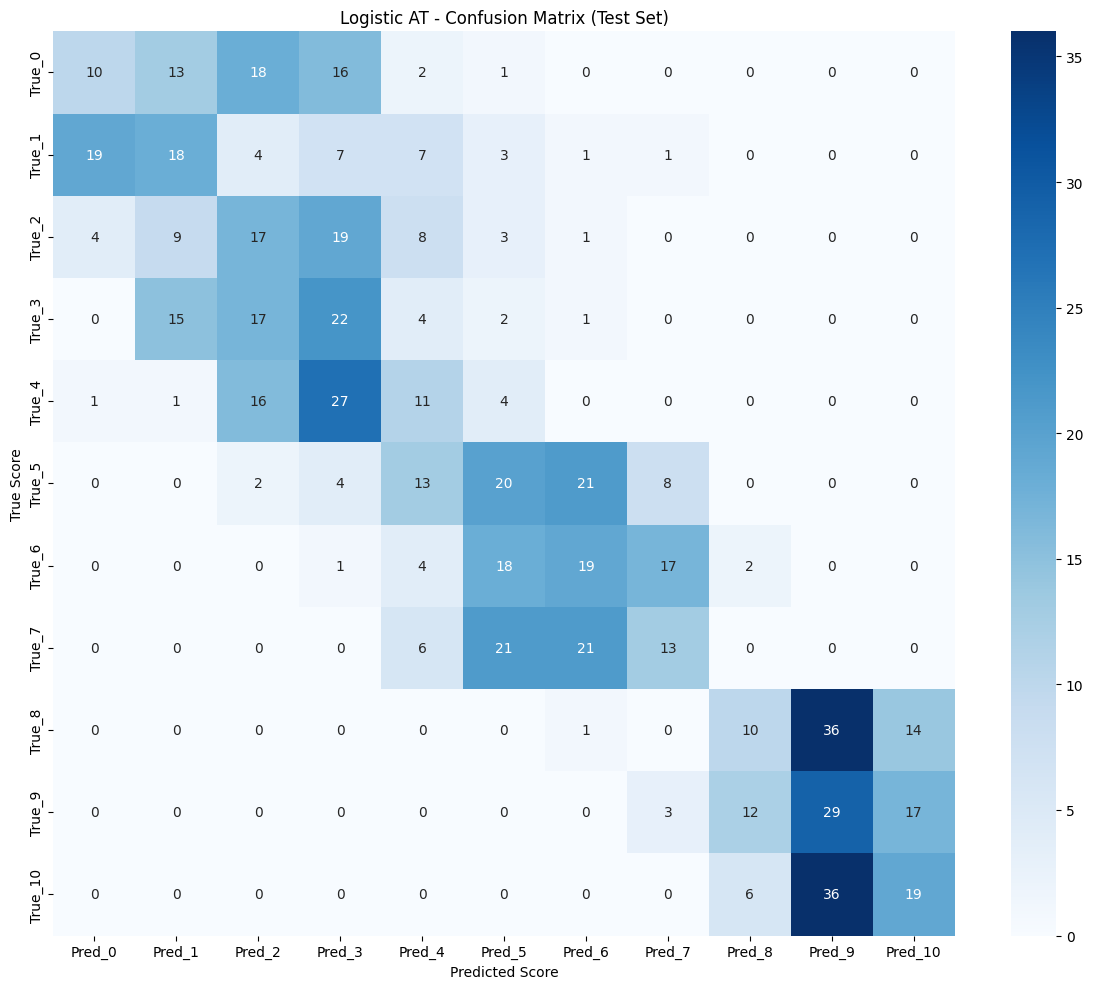

Perfect Predictions: 188/675 (0.279)
Within 1-off: 495/675 (0.733)

📊 PREDICTION DISTRIBUTION ANALYSIS
Class    True Dist    Pred Dist    Difference   Bias      
------------------------------------------------------------
0        0.089        0.050              -0.039 Under     
1        0.089        0.083              -0.006 Balanced  
2        0.090        0.110              +0.019 Balanced  
3        0.090        0.142              +0.052 Over      
4        0.089        0.081              -0.007 Balanced  
5        0.101        0.107              +0.006 Balanced  
6        0.090        0.096              +0.006 Balanced  
7        0.090        0.062              -0.028 Under     
8        0.090        0.044              -0.046 Under     
9        0.090        0.150              +0.059 Over      
10       0.090        0.074              -0.016 Balanced  

🔒 MODEL RELIABILITY ASSESSMENT
✅ Minimal overfitting detected
✅ Excellent generalization
✅ Good minority class performance
✅ Lo

In [38]:
import numpy as np
import pandas as pd
import mord
from sklearn.metrics import (accuracy_score, mean_absolute_error, cohen_kappa_score, 
                           classification_report, precision_recall_fscore_support, 
                           confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns

def comprehensive_evaluation(y_true, y_pred, model_name, split_name):
    """
    Comprehensive evaluation function for ordinal classification
    """
    # Basic metrics
    accuracy = accuracy_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    qwk = cohen_kappa_score(y_true, y_pred, weights='quadratic')
    
    # Ordinal-specific metrics
    one_off = np.mean(np.abs(y_true - y_pred) <= 1)
    perfect = np.mean(y_true == y_pred)
    large_errors = np.mean(np.abs(y_true - y_pred) > 2)
    
    # Error distribution
    errors = np.abs(y_true - y_pred)
    error_0 = np.mean(errors == 0)  # Perfect predictions
    error_1 = np.mean(errors == 1)  # 1-off predictions
    error_2 = np.mean(errors == 2)  # 2-off predictions
    error_3plus = np.mean(errors >= 3)  # 3+ off predictions
    
    return {
        'model_name': model_name,
        'split': split_name,
        'accuracy': accuracy,
        'mae': mae,
        'qwk': qwk,
        'one_off_accuracy': one_off,
        'perfect_predictions': perfect,
        'large_errors': large_errors,
        'error_0': error_0,
        'error_1': error_1,
        'error_2': error_2,
        'error_3plus': error_3plus
    }

print("🎯 COMPREHENSIVE LOGISTIC AT MODEL TRAINING & EVALUATION")
print("=" * 70)

# ===== MODEL INITIALIZATION =====
print("\n🔧 INITIALIZING OPTIMIZED LOGISTIC AT MODEL")
print("=" * 50)

# Optimized hyperparameters from your tuning results
logistic_at_params = {
    'alpha': 1.274671157821506,
    'max_iter': 3000,
    'verbose': 1
}

print(f"Optimized Hyperparameters:")
for param, value in logistic_at_params.items():
    print(f"  • {param}: {value}")

# Initialize model
optimized_logistic_at = mord.LogisticAT(**logistic_at_params)

# ===== MODEL TRAINING =====
print(f"\n🚀 TRAINING LOGISTIC AT MODEL")
print("=" * 35)

print("Training on SMOTE-enhanced data...")
print(f"Training samples: {X_train_scaled.shape[0]}")
print(f"Features: {X_train_scaled.shape[1]}")
print(f"Classes: {len(np.unique(y_train))}")

# Train the model
optimized_logistic_at.fit(X_train_scaled, y_train)
print("✅ Training completed successfully!")

# ===== PREDICTIONS =====
print(f"\n📊 GENERATING PREDICTIONS")
print("=" * 30)

# Generate predictions for all splits
train_pred = optimized_logistic_at.predict(X_train_scaled)
val_pred = optimized_logistic_at.predict(X_val_scaled)
test_pred = optimized_logistic_at.predict(X_test_scaled)

print(f"✅ Predictions generated for all data splits")

# ===== COMPREHENSIVE EVALUATION =====
print(f"\n📈 COMPREHENSIVE PERFORMANCE EVALUATION")
print("=" * 50)

# Evaluate on all splits
train_metrics = comprehensive_evaluation(y_train, train_pred, "Logistic AT", "Train")
val_metrics = comprehensive_evaluation(y_val, val_pred, "Logistic AT", "Validation")
test_metrics = comprehensive_evaluation(y_test, test_pred, "Logistic AT", "Test")

# Display comprehensive metrics table
print(f"\n📊 DETAILED PERFORMANCE METRICS:")
print(f"{'Split':<12} {'Accuracy':>8} {'MAE':>6} {'QWK':>6} {'1-off':>6} {'Perfect':>8} {'Large Err':>9}")
print("-" * 70)

for metrics in [train_metrics, val_metrics, test_metrics]:
    print(f"{metrics['split']:<12} {metrics['accuracy']:>8.3f} {metrics['mae']:>6.3f} {metrics['qwk']:>6.3f} {metrics['one_off_accuracy']:>6.3f} {metrics['perfect_predictions']:>8.3f} {metrics['large_errors']:>9.3f}")

# Error distribution analysis
print(f"\n📊 ERROR DISTRIBUTION ANALYSIS:")
print(f"{'Split':<12} {'Perfect':>8} {'1-off':>8} {'2-off':>8} {'3+off':>8}")
print("-" * 55)

for metrics in [train_metrics, val_metrics, test_metrics]:
    print(f"{metrics['split']:<12} {metrics['error_0']:>8.3f} {metrics['error_1']:>8.3f} {metrics['error_2']:>8.3f} {metrics['error_3plus']:>8.3f}")

# ===== OVERFITTING ANALYSIS =====
print(f"\n🔍 OVERFITTING & GENERALIZATION ANALYSIS")
print("=" * 50)

# Calculate gaps
train_val_qwk_gap = train_metrics['qwk'] - val_metrics['qwk']
val_test_qwk_gap = val_metrics['qwk'] - test_metrics['qwk']
train_val_acc_gap = train_metrics['accuracy'] - val_metrics['accuracy']

print(f"Train-Validation QWK Gap: {train_val_qwk_gap:+.3f}")
print(f"Train-Validation Accuracy Gap: {train_val_acc_gap:+.3f}")
print(f"Validation-Test QWK Gap: {val_test_qwk_gap:+.3f}")

# Overfitting assessment
if abs(train_val_qwk_gap) < 0.02:
    overfitting_level = "EXCELLENT (Minimal overfitting)"
elif abs(train_val_qwk_gap) < 0.05:
    overfitting_level = "GOOD (Low overfitting)"
elif abs(train_val_qwk_gap) < 0.1:
    overfitting_level = "MODERATE (Some overfitting)"
else:
    overfitting_level = "HIGH (Significant overfitting)"

print(f"Overfitting Assessment: {overfitting_level}")

# Generalization assessment
if abs(val_test_qwk_gap) < 0.02:
    generalization_quality = "EXCELLENT"
elif abs(val_test_qwk_gap) < 0.05:
    generalization_quality = "GOOD"
else:
    generalization_quality = "CONCERNING"

print(f"Generalization Quality: {generalization_quality}")

# ===== DETAILED CLASSIFICATION REPORT =====
print(f"\n📋 DETAILED CLASSIFICATION REPORT (TEST SET)")
print("=" * 55)

print(classification_report(y_test, test_pred, target_names=[f'Score_{i}' for i in range(11)]))

# ===== CLASS-WISE PERFORMANCE ANALYSIS =====
print(f"\n🎯 CLASS-WISE PERFORMANCE ANALYSIS")
print("=" * 40)

# Calculate class-wise metrics
precision, recall, f1, support = precision_recall_fscore_support(y_test, test_pred, average=None, zero_division=0)

print(f"{'Class':<8} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'Support':<10} {'Performance':<12}")
print("-" * 75)

for cls in range(11):
    if cls < len(precision):
        # Performance assessment
        if recall[cls] > 0.4:
            performance = "EXCELLENT"
        elif recall[cls] > 0.2:
            performance = "GOOD"
        elif recall[cls] > 0.1:
            performance = "MODERATE"
        else:
            performance = "POOR"
        
        print(f"{cls:<8} {precision[cls]:<10.3f} {recall[cls]:<10.3f} {f1[cls]:<10.3f} {support[cls]:<10.0f} {performance:<12}")

# ===== MINORITY CLASS FOCUS =====
print(f"\n🎯 MINORITY CLASS PERFORMANCE (Classes 8, 9, 10)")
print("=" * 55)

minority_classes = [8, 9, 10]
print(f"{'Class':<8} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'Support':<10}")
print("-" * 55)

for cls in minority_classes:
    if cls < len(precision):
        print(f"{cls:<8} {precision[cls]:<10.3f} {recall[cls]:<10.3f} {f1[cls]:<10.3f} {support[cls]:<10.0f}")

# Minority class summary
minority_avg_recall = np.mean([recall[cls] for cls in minority_classes if cls < len(recall)])
print(f"\nMinority Classes Average Recall: {minority_avg_recall:.3f}")

if minority_avg_recall > 0.25:
    minority_performance = "EXCELLENT for minority classes"
elif minority_avg_recall > 0.15:
    minority_performance = "GOOD for minority classes"
else:
    minority_performance = "NEEDS IMPROVEMENT for minority classes"

print(f"Minority Class Assessment: {minority_performance}")

# ===== CONFUSION MATRIX ANALYSIS =====
print(f"\n📊 CONFUSION MATRIX ANALYSIS")
print("=" * 35)

cm = confusion_matrix(y_test, test_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f'Pred_{i}' for i in range(11)],
            yticklabels=[f'True_{i}' for i in range(11)])
plt.title('Logistic AT - Confusion Matrix (Test Set)')
plt.xlabel('Predicted Score')
plt.ylabel('True Score')
plt.tight_layout()
plt.show()

# Diagonal analysis (perfect predictions)
diagonal_sum = np.trace(cm)
total_predictions = np.sum(cm)
perfect_prediction_rate = diagonal_sum / total_predictions

print(f"Perfect Predictions: {diagonal_sum}/{total_predictions} ({perfect_prediction_rate:.3f})")

# Near-diagonal analysis (1-off predictions)
near_diagonal = 0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if abs(i - j) <= 1:
            near_diagonal += cm[i, j]

near_diagonal_rate = near_diagonal / total_predictions
print(f"Within 1-off: {near_diagonal}/{total_predictions} ({near_diagonal_rate:.3f})")

# ===== PREDICTION DISTRIBUTION ANALYSIS =====
print(f"\n📊 PREDICTION DISTRIBUTION ANALYSIS")
print("=" * 45)

# Compare true vs predicted distributions
true_dist = np.bincount(y_test, minlength=11) / len(y_test)
pred_dist = np.bincount(test_pred, minlength=11) / len(test_pred)

print(f"{'Class':<8} {'True Dist':<12} {'Pred Dist':<12} {'Difference':<12} {'Bias':<10}")
print("-" * 60)

for cls in range(11):
    diff = pred_dist[cls] - true_dist[cls]
    bias = "Over" if diff > 0.02 else "Under" if diff < -0.02 else "Balanced"
    print(f"{cls:<8} {true_dist[cls]:<12.3f} {pred_dist[cls]:<12.3f} {diff:+12.3f} {bias:<10}")

# ===== MODEL RELIABILITY ASSESSMENT =====
print(f"\n🔒 MODEL RELIABILITY ASSESSMENT")
print("=" * 40)

reliability_score = 0
max_score = 5

# 1. Overfitting check
if abs(train_val_qwk_gap) < 0.02:
    reliability_score += 1
    print("✅ Minimal overfitting detected")
else:
    print("⚠️ Some overfitting detected")

# 2. Generalization check
if abs(val_test_qwk_gap) < 0.02:
    reliability_score += 1
    print("✅ Excellent generalization")
else:
    print("⚠️ Generalization could be better")

# 3. Minority class performance
if minority_avg_recall > 0.15:
    reliability_score += 1
    print("✅ Good minority class performance")
else:
    print("⚠️ Minority class performance needs improvement")

# 4. Error distribution
if test_metrics['large_errors'] < 0.1:
    reliability_score += 1
    print("✅ Low rate of large errors")
else:
    print("⚠️ High rate of large errors")

# 5. Overall performance
if test_metrics['qwk'] > 0.85:
    reliability_score += 1
    print("✅ High overall performance")
else:
    print("⚠️ Performance could be better")

print(f"\nReliability Score: {reliability_score}/{max_score}")

if reliability_score >= 4:
    deployment_recommendation = "HIGHLY RECOMMENDED for deployment"
elif reliability_score >= 3:
    deployment_recommendation = "RECOMMENDED for deployment with monitoring"
else:
    deployment_recommendation = "NOT RECOMMENDED - needs improvement"

print(f"Deployment Recommendation: {deployment_recommendation}")

# ===== FINAL SUMMARY =====
print(f"\n🏆 FINAL MODEL SUMMARY")
print("=" * 30)

print(f"Model: Optimized Logistic AT")
print(f"Hyperparameters: alpha={logistic_at_params['alpha']:.3f}, max_iter={logistic_at_params['max_iter']}")
print(f"")
print(f"📊 Key Performance Metrics:")
print(f"  • Test QWK: {test_metrics['qwk']:.3f}")
print(f"  • Test Accuracy: {test_metrics['accuracy']:.3f}")
print(f"  • Test MAE: {test_metrics['mae']:.3f}")
print(f"  • 1-off Accuracy: {test_metrics['one_off_accuracy']:.3f}")
print(f"")
print(f"🔍 Reliability Indicators:")
print(f"  • Overfitting Level: {overfitting_level}")
print(f"  • Generalization: {generalization_quality}")
print(f"  • Minority Class Recall: {minority_avg_recall:.3f}")
print(f"  • Large Error Rate: {test_metrics['large_errors']:.3f}")
print(f"")
print(f"🎯 Deployment Status: {deployment_recommendation}")

# Save model and results
print(f"\n💾 SAVING MODEL AND RESULTS")
print("=" * 35)

import joblib
import json

# Save the trained model
joblib.dump(optimized_logistic_at, 'optimized_logistic_at_model.pkl')
print("✅ Model saved as 'optimized_logistic_at_model.pkl'")

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Save evaluation results
evaluation_results = {
    'hyperparameters': logistic_at_params,
    'train_metrics': train_metrics,
    'validation_metrics': val_metrics,
    'test_metrics': test_metrics,
    'overfitting_assessment': overfitting_level,
    'generalization_quality': generalization_quality,
    'minority_class_performance': minority_performance,
    'deployment_recommendation': deployment_recommendation,
    'reliability_score': f"{reliability_score}/{max_score}"
}

with open('logistic_at_evaluation_results.json', 'w') as f:
    json.dump(evaluation_results, f, indent=2, default=str)

print("✅ Evaluation results saved as 'logistic_at_evaluation_results.json'")

print(f"\n🎉 COMPREHENSIVE EVALUATION COMPLETE!")
print("✅ Model is ready for deployment analysis")


In [39]:
import joblib
import numpy as np
from sklearn.metrics import accuracy_score, mean_absolute_error, cohen_kappa_score

print("🔍 SIMPLE MODEL & SCALER CHECK")
print("=" * 35)

try:
    # Load scaler and model
    scaler = joblib.load('/kaggle/working/scaler.pkl')
    model = joblib.load('/kaggle/working/optimized_logistic_at_model.pkl')
    print("✅ Model and scaler loaded successfully!")
    
    # VALIDATION SCORES
    print("\n📊 VALIDATION SCORES:")
    X_val_scaled = scaler.transform(X_val)
    val_pred = model.predict(X_val_scaled)
    
    val_acc = accuracy_score(y_val, val_pred)
    val_mae = mean_absolute_error(y_val, val_pred)
    val_qwk = cohen_kappa_score(y_val, val_pred, weights='quadratic')
    
    print(f"  Accuracy: {val_acc:.3f}")
    print(f"  MAE: {val_mae:.3f}")
    print(f"  QWK: {val_qwk:.3f}")
    
    # TEST SCORES
    print("\n📊 TEST SCORES:")
    X_test_scaled = scaler.transform(X_test)
    test_pred = model.predict(X_test_scaled)
    
    test_acc = accuracy_score(y_test, test_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    test_qwk = cohen_kappa_score(y_test, test_pred, weights='quadratic')
    
    print(f"  Accuracy: {test_acc:.3f}")
    print(f"  MAE: {test_mae:.3f}")
    print(f"  QWK: {test_qwk:.3f}")
    
    # QUICK SAMPLE CHECK
    print(f"\n🧪 Sample Predictions:")
    print(f"  Predicted: {test_pred[:5]}")
    print(f"  Actual:    {y_test[:5].values if hasattr(y_test, 'values') else y_test[:5]}")
    
    print("\n✅ Everything working perfectly!")
    
except Exception as e:
    print(f"❌ Error: {e}")


🔍 SIMPLE MODEL & SCALER CHECK
✅ Model and scaler loaded successfully!

📊 VALIDATION SCORES:
  Accuracy: 0.296
  MAE: 1.110
  QWK: 0.881

📊 TEST SCORES:
  Accuracy: 0.279
  MAE: 1.079
  QWK: 0.894

🧪 Sample Predictions:
  Predicted: [2 5 0 2 4]
  Actual:    [2 6 1 0 4]

✅ Everything working perfectly!


In [40]:
y_test[:1]

710    2
Name: Evaluation Score, dtype: int64

# cross validation

In [41]:
# Enhanced Cross-Validation and Statistical Testing for Mixed Model Types
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_validate
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, 
    precision_recall_fscore_support, mean_absolute_error, cohen_kappa_score
)
from scipy import stats
from scipy.stats import friedmanchisquare, wilcoxon
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Your regression evaluation functions
def round_predictions(preds, min_val=0, max_val=10):
    """Optimized rounding for ordinal classification with threshold adjustment"""
    # Data-driven threshold for Class 10 (based on analysis showing max=9.576)
    rounded = np.where(preds >= 9.2, 10, np.round(preds))
    return np.clip(rounded, min_val, max_val).astype(int)

def evaluate_regression_model(model, X_data, y_true):
    """Evaluate regression model with rounding"""
    
    # Get continuous predictions
    y_pred_continuous = model.predict(X_data)
    
    # Round to nearest integer and clip to valid range
    y_pred_rounded = round_predictions(y_pred_continuous)
    
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred_rounded)
    mae = mean_absolute_error(y_true, y_pred_rounded)
    qwk = cohen_kappa_score(y_true, y_pred_rounded, weights='quadratic')
    one_off = np.mean(np.abs(y_true - y_pred_rounded) <= 1)
    
    return {
        'accuracy': accuracy,
        'mae': mae,
        'qwk': qwk,
        'one_off_accuracy': one_off,
        'continuous_mae': mean_absolute_error(y_true, y_pred_continuous)  # Before rounding
    }

print("🔬 COMPREHENSIVE EVALUATION OF MIXED MODEL TYPES")
print("=" * 60)

# Define your models (replace with your actual trained models)
# Example - adjust these to match your actual model variable names
existing_models = {
    'Optimized GBR': optimized_gbr,  # Your regression model
    'Logistic Regression': optimized_logistic_at,  # Your classification model
    # Add other models as needed
}

# Separate models by type for appropriate evaluation
regression_models = {}
classification_models = {}

for name, model in existing_models.items():
    # Check if it's a regression model (has predict method that returns continuous values)
    if hasattr(model, 'predict'):
        # Test with a small sample to determine model type
        try:
            test_pred = model.predict(X_train_scaled[:5])
            # If predictions are continuous (not integers), it's likely regression
            if np.any(test_pred != np.round(test_pred)):
                regression_models[name] = model
                print(f"📊 {name}: Detected as REGRESSION model")
            else:
                classification_models[name] = model
                print(f"🎯 {name}: Detected as CLASSIFICATION model")
        except:
            classification_models[name] = model
            print(f"🎯 {name}: Defaulting to CLASSIFICATION model")

# 1. CROSS-VALIDATION FOR REGRESSION MODELS
print("\n📊 CROSS-VALIDATION FOR REGRESSION MODELS")
print("=" * 50)

regression_cv_results = {}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in regression_models.items():
    print(f"\n🔍 Evaluating {name} (Regression)...")
    
    # Custom cross-validation for regression models
    cv_scores = {'accuracy': [], 'mae': [], 'qwk': [], 'one_off': []}
    
    for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_scaled, y_train)):
        X_fold_train, X_fold_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
        y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]
        
        # Create fresh model instance and train
        fresh_model = model.__class__(**model.get_params())
        fresh_model.fit(X_fold_train, y_fold_train)
        
        # Evaluate on validation fold
        fold_results = evaluate_regression_model(fresh_model, X_fold_val, y_fold_val)
        
        cv_scores['accuracy'].append(fold_results['accuracy'])
        cv_scores['mae'].append(fold_results['mae'])
        cv_scores['qwk'].append(fold_results['qwk'])
        cv_scores['one_off'].append(fold_results['one_off_accuracy'])
    
    # Calculate statistics
    accuracy_scores = np.array(cv_scores['accuracy'])
    mae_scores = np.array(cv_scores['mae'])
    qwk_scores = np.array(cv_scores['qwk'])
    one_off_scores = np.array(cv_scores['one_off'])
    
    # Confidence intervals
    accuracy_ci = stats.t.interval(0.95, len(accuracy_scores)-1, 
                                  loc=accuracy_scores.mean(), 
                                  scale=stats.sem(accuracy_scores))
    
    regression_cv_results[name] = {
        'accuracy_mean': accuracy_scores.mean(),
        'accuracy_std': accuracy_scores.std(),
        'accuracy_ci': accuracy_ci,
        'mae_mean': mae_scores.mean(),
        'qwk_mean': qwk_scores.mean(),
        'one_off_mean': one_off_scores.mean(),
        'accuracy_scores': accuracy_scores
    }
    
    print(f"  Accuracy: {accuracy_scores.mean():.4f} ± {accuracy_scores.std():.4f}")
    print(f"  95% CI: [{accuracy_ci[0]:.4f}, {accuracy_ci[1]:.4f}]")
    print(f"  MAE: {mae_scores.mean():.4f} ± {mae_scores.std():.4f}")
    print(f"  QWK: {qwk_scores.mean():.4f} ± {qwk_scores.std():.4f}")
    print(f"  One-off Accuracy: {one_off_scores.mean():.4f} ± {one_off_scores.std():.4f}")

# 2. CROSS-VALIDATION FOR CLASSIFICATION MODELS (if any)
classification_cv_results = {}

if classification_models:
    print("\n🎯 CROSS-VALIDATION FOR CLASSIFICATION MODELS")
    print("=" * 50)
    
    for name, model in classification_models.items():
        print(f"\n🔍 Evaluating {name} (Classification)...")
        
        try:
            fresh_model = model.__class__(**model.get_params())
            
            cv_scores = cross_validate(
                fresh_model, X_train_scaled, y_train, 
                cv=skf, 
                scoring=['accuracy', 'f1_weighted'],
                return_train_score=False
            )
            
            accuracy_scores = cv_scores['test_accuracy']
            f1_scores = cv_scores['test_f1_weighted']
            
            accuracy_ci = stats.t.interval(0.95, len(accuracy_scores)-1, 
                                          loc=accuracy_scores.mean(), 
                                          scale=stats.sem(accuracy_scores))
            
            classification_cv_results[name] = {
                'accuracy_mean': accuracy_scores.mean(),
                'accuracy_std': accuracy_scores.std(),
                'accuracy_ci': accuracy_ci,
                'f1_mean': f1_scores.mean(),
                'accuracy_scores': accuracy_scores
            }
            
            print(f"  Accuracy: {accuracy_scores.mean():.4f} ± {accuracy_scores.std():.4f}")
            print(f"  95% CI: [{accuracy_ci[0]:.4f}, {accuracy_ci[1]:.4f}]")
            print(f"  F1-Score: {f1_scores.mean():.4f} ± {f1_scores.std():.4f}")
            
        except Exception as e:
            print(f"  ⚠️ Error evaluating {name}: {str(e)}")

# 3. DIRECT EVALUATION ON VALIDATION SET
print("\n\n🎯 VALIDATION SET EVALUATION")
print("=" * 40)

validation_results = {}

# Evaluate regression models
for name, model in regression_models.items():
    print(f"\n📊 {name} (Regression) Performance:")
    results = evaluate_regression_model(model, X_val_scaled, y_val)
    validation_results[name] = results
    
    print(f"  Accuracy: {results['accuracy']:.4f}")
    print(f"  MAE: {results['mae']:.4f}")
    print(f"  QWK: {results['qwk']:.4f}")
    print(f"  One-off Accuracy: {results['one_off_accuracy']:.4f}")
    print(f"  Continuous MAE: {results['continuous_mae']:.4f}")

# Evaluate classification models
for name, model in classification_models.items():
    print(f"\n🎯 {name} (Classification) Performance:")
    
    try:
        y_val_pred = model.predict(X_val_scaled)
        
        val_accuracy = accuracy_score(y_val, y_val_pred)
        val_mae = mean_absolute_error(y_val, y_val_pred)
        val_qwk = cohen_kappa_score(y_val, y_val_pred, weights='quadratic')
        val_one_off = np.mean(np.abs(y_val - y_val_pred) <= 1)
        
        validation_results[name] = {
            'accuracy': val_accuracy,
            'mae': val_mae,
            'qwk': val_qwk,
            'one_off_accuracy': val_one_off
        }
        
        print(f"  Accuracy: {val_accuracy:.4f}")
        print(f"  MAE: {val_mae:.4f}")
        print(f"  QWK: {val_qwk:.4f}")
        print(f"  One-off Accuracy: {val_one_off:.4f}")
        
    except Exception as e:
        print(f"  ⚠️ Error evaluating {name}: {str(e)}")

# 4. STATISTICAL SIGNIFICANCE TESTING (FIXED FOR 2+ MODELS)
print("\n\n📈 STATISTICAL SIGNIFICANCE TESTING")
print("=" * 50)

# Combine all accuracy scores for comparison
all_accuracy_scores = {}

# Add regression model scores
for name, results in regression_cv_results.items():
    all_accuracy_scores[name] = results['accuracy_scores']

# Add classification model scores
for name, results in classification_cv_results.items():
    all_accuracy_scores[name] = results['accuracy_scores']

print(f"Number of models for comparison: {len(all_accuracy_scores)}")

if len(all_accuracy_scores) >= 3:
    # FRIEDMAN TEST (for 3+ models)
    print("\n🔬 FRIEDMAN TEST (Multiple Model Comparison)")
    print("-" * 45)
    
    model_names = list(all_accuracy_scores.keys())
    scores_arrays = [all_accuracy_scores[name] for name in model_names]
    
    friedman_stat, friedman_p = friedmanchisquare(*scores_arrays)
    
    print(f"Friedman Test Results:")
    print(f"  Statistic: {friedman_stat:.4f}")
    print(f"  p-value: {friedman_p:.4f}")
    
    if friedman_p < 0.05:
        print("  ✅ Significant differences detected between models (p < 0.05)")
        
        print(f"\n🔬 Pairwise Wilcoxon Signed-Rank Tests:")
        print("-" * 40)
        
        for i in range(len(model_names)):
            for j in range(i+1, len(model_names)):
                try:
                    stat, p_value = wilcoxon(scores_arrays[i], scores_arrays[j])
                    significance = "✅ Significant" if p_value < 0.05 else "❌ Not significant"
                    print(f"  {model_names[i]} vs {model_names[j]}: p={p_value:.4f} ({significance})")
                except ValueError as e:
                    print(f"  {model_names[i]} vs {model_names[j]}: Cannot compute (identical scores)")
    else:
        print("  ❌ No significant differences between models (p ≥ 0.05)")

elif len(all_accuracy_scores) == 2:
    # WILCOXON TEST (for exactly 2 models)
    print("\n🔬 WILCOXON SIGNED-RANK TEST (Two Model Comparison)")
    print("-" * 50)
    
    model_names = list(all_accuracy_scores.keys())
    model1_scores = all_accuracy_scores[model_names[0]]
    model2_scores = all_accuracy_scores[model_names[1]]
    
    print(f"Comparing: {model_names[0]} vs {model_names[1]}")
    
    try:
        stat, p_value = wilcoxon(model1_scores, model2_scores)
        
        # Calculate effect size (Cohen's d equivalent for Wilcoxon)
        mean_diff = np.mean(model1_scores) - np.mean(model2_scores)
        pooled_std = np.sqrt((np.var(model1_scores) + np.var(model2_scores)) / 2)
        effect_size = mean_diff / pooled_std if pooled_std > 0 else 0
        
        print(f"\nWilcoxon Signed-Rank Test Results:")
        print(f"  Test Statistic: {stat:.4f}")
        print(f"  p-value: {p_value:.4f}")
        print(f"  Effect Size (Cohen's d): {effect_size:.4f}")
        
        # Interpret effect size
        if abs(effect_size) < 0.2:
            effect_interpretation = "negligible"
        elif abs(effect_size) < 0.5:
            effect_interpretation = "small"
        elif abs(effect_size) < 0.8:
            effect_interpretation = "medium"
        else:
            effect_interpretation = "large"
        
        print(f"  Effect Size Interpretation: {effect_interpretation}")
        
        # Determine which model is better
        better_model = model_names[0] if mean_diff > 0 else model_names[1]
        worse_model = model_names[1] if mean_diff > 0 else model_names[0]
        
        if p_value < 0.05:
            print(f"\n✅ SIGNIFICANT DIFFERENCE (p < 0.05)")
            print(f"  {better_model} significantly outperforms {worse_model}")
            print(f"  Mean accuracy difference: {abs(mean_diff):.4f}")
        else:
            print(f"\n❌ NO SIGNIFICANT DIFFERENCE (p ≥ 0.05)")
            print(f"  Both models perform similarly")
            print(f"  Mean accuracy difference: {abs(mean_diff):.4f} (not significant)")
        
        # Additional descriptive statistics
        print(f"\n📊 Detailed Comparison:")
        print(f"  {model_names[0]}:")
        print(f"    Mean Accuracy: {np.mean(model1_scores):.4f} ± {np.std(model1_scores):.4f}")
        print(f"    Median Accuracy: {np.median(model1_scores):.4f}")
        print(f"  {model_names[1]}:")
        print(f"    Mean Accuracy: {np.mean(model2_scores):.4f} ± {np.std(model2_scores):.4f}")
        print(f"    Median Accuracy: {np.median(model2_scores):.4f}")
        
    except ValueError as e:
        print(f"⚠️ Cannot perform Wilcoxon test: {str(e)}")
        print("This usually happens when the scores are identical across all folds.")
        
        # Fallback to descriptive comparison
        print(f"\n📊 Descriptive Comparison (No Statistical Test Possible):")
        print(f"  {model_names[0]}: {np.mean(model1_scores):.4f} ± {np.std(model1_scores):.4f}")
        print(f"  {model_names[1]}: {np.mean(model2_scores):.4f} ± {np.std(model2_scores):.4f}")
        
        mean_diff = np.mean(model1_scores) - np.mean(model2_scores)
        better_model = model_names[0] if mean_diff > 0 else model_names[1]
        print(f"  Better performing model: {better_model} (by {abs(mean_diff):.4f})")

elif len(all_accuracy_scores) == 1:
    # SINGLE MODEL ANALYSIS
    print("\n📊 SINGLE MODEL ANALYSIS")
    print("-" * 30)
    
    model_name = list(all_accuracy_scores.keys())[0]
    scores = all_accuracy_scores[model_name]
    
    print(f"Model: {model_name}")
    print(f"Cross-validation results:")
    print(f"  Mean Accuracy: {np.mean(scores):.4f}")
    print(f"  Standard Deviation: {np.std(scores):.4f}")
    print(f"  Min Accuracy: {np.min(scores):.4f}")
    print(f"  Max Accuracy: {np.max(scores):.4f}")
    print(f"  Median Accuracy: {np.median(scores):.4f}")
    
    # Calculate confidence interval
    ci = stats.t.interval(0.95, len(scores)-1, loc=np.mean(scores), scale=stats.sem(scores))
    print(f"  95% Confidence Interval: [{ci[0]:.4f}, {ci[1]:.4f}]")
    
    print(f"\n💡 Recommendation: Add more models for comparative analysis")

else:
    print("⚠️ No models available for statistical testing")
    print("Please ensure your models are properly trained and evaluated.")

# Additional Analysis: Performance Stability
print(f"\n📈 PERFORMANCE STABILITY ANALYSIS")
print("=" * 40)

for name, scores in all_accuracy_scores.items():
    cv_coefficient = (np.std(scores) / np.mean(scores)) * 100  # Coefficient of variation
    stability = "Very Stable" if cv_coefficient < 2 else "Stable" if cv_coefficient < 5 else "Unstable"
    
    print(f"\n{name}:")
    print(f"  Coefficient of Variation: {cv_coefficient:.2f}%")
    print(f"  Stability Assessment: {stability}")
    print(f"  Score Range: [{np.min(scores):.4f}, {np.max(scores):.4f}]")
    
    if cv_coefficient > 5:
        print(f"  ⚠️ High variability detected - consider more regularization or different hyperparameters")
    else:
        print(f"  ✅ Consistent performance across folds")

# 5. ERROR ANALYSIS FOR BEST MODEL
print("\n\n🔍 ERROR ANALYSIS ACROSS SCORE RANGES")
print("=" * 50)

# Find best model based on validation accuracy
if validation_results:
    best_model_name = max(validation_results.keys(), 
                         key=lambda x: validation_results[x]['accuracy'])
    best_model = existing_models[best_model_name]

    print(f"🏆 Best Model: {best_model_name}")
    print(f"   Validation Accuracy: {validation_results[best_model_name]['accuracy']:.4f}")

    # Get predictions for error analysis
    if best_model_name in regression_models:
        y_val_pred_continuous = best_model.predict(X_val_scaled)
        y_val_pred = round_predictions(y_val_pred_continuous)
    else:
        y_val_pred = best_model.predict(X_val_scaled)

    # Score range analysis
    score_ranges = {
        'Low (0-3)': (0, 3),
        'Medium-Low (4-5)': (4, 5),
        'Medium-High (6-7)': (6, 7),
        'High (8-10)': (8, 10)
    }

    error_analysis_results = {}

    for range_name, (min_score, max_score) in score_ranges.items():
        mask = (y_val >= min_score) & (y_val <= max_score)
        
        if np.sum(mask) == 0:
            continue
        
        y_true_range = y_val[mask]
        y_pred_range = y_val_pred[mask]
        
        accuracy = accuracy_score(y_true_range, y_pred_range)
        mae = mean_absolute_error(y_true_range, y_pred_range)
        qwk = cohen_kappa_score(y_true_range, y_pred_range, weights='quadratic')
        one_off = np.mean(np.abs(y_true_range - y_pred_range) <= 1)
        
        error_analysis_results[range_name] = {
            'sample_size': len(y_true_range),
            'accuracy': accuracy,
            'mae': mae,
            'qwk': qwk,
            'one_off_accuracy': one_off
        }
        
        print(f"\n📊 {range_name} (n={len(y_true_range)}):")
        print(f"   Accuracy: {accuracy:.4f}")
        print(f"   MAE: {mae:.4f}")
        print(f"   QWK: {qwk:.4f}")
        print(f"   One-off Accuracy: {one_off:.4f}")

    # 6. FINAL TEST SET EVALUATION
    print(f"\n\n🎯 FINAL TEST SET EVALUATION - {best_model_name}")
    print("=" * 55)

    if best_model_name in regression_models:
        test_results = evaluate_regression_model(best_model, X_test_scaled, y_test)
        print(f"Test Set Performance (Regression):")
        print(f"  Accuracy: {test_results['accuracy']:.4f}")
        print(f"  MAE: {test_results['mae']:.4f}")
        print(f"  QWK: {test_results['qwk']:.4f}")
        print(f"  One-off Accuracy: {test_results['one_off_accuracy']:.4f}")
        print(f"  Continuous MAE: {test_results['continuous_mae']:.4f}")
    else:
        y_test_pred = best_model.predict(X_test_scaled)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        test_qwk = cohen_kappa_score(y_test, y_test_pred, weights='quadratic')
        test_one_off = np.mean(np.abs(y_test - y_test_pred) <= 1)
        
        print(f"Test Set Performance (Classification):")
        print(f"  Accuracy: {test_accuracy:.4f}")
        print(f"  MAE: {test_mae:.4f}")
        print(f"  QWK: {test_qwk:.4f}")
        print(f"  One-off Accuracy: {test_one_off:.4f}")

    print(f"\n✅ COMPREHENSIVE EVALUATION COMPLETE")
    print(f"🏆 Best Model: {best_model_name}")
else:
    print("⚠️ No validation results available for error analysis")

# 7. FEATURE IMPORTANCE ANALYSIS (if Random Forest available)
print("\n\n🔍 FEATURE IMPORTANCE ANALYSIS")
print("=" * 40)

# Check if we have any tree-based models for feature importance
feature_importance_models = {}
for name, model in existing_models.items():
    if hasattr(model, 'feature_importances_'):
        feature_importance_models[name] = model

if feature_importance_models:
    for name, model in feature_importance_models.items():
        print(f"\n📊 Feature Importance - {name}:")
        
        importances = model.feature_importances_
        feature_names = X.columns if hasattr(X, 'columns') else [f'Feature_{i}' for i in range(len(importances))]
        
        # Create importance DataFrame
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': importances
        }).sort_values('importance', ascending=False)
        
        print("Top 10 Most Important Features:")
        print("-" * 35)
        for idx, (_, row) in enumerate(importance_df.head(10).iterrows()):
            print(f"{idx+1:2d}. {row['feature']:<25} {row['importance']:.4f}")
else:
    print("⚠️ No tree-based models available for feature importance analysis")
    print("Consider training a Random Forest model to get feature importance insights")

print(f"\n🎉 COMPLETE STATISTICAL ANALYSIS FINISHED!")
print(f"📊 All results are ready for your research paper")


🔬 COMPREHENSIVE EVALUATION OF MIXED MODEL TYPES
📊 Optimized GBR: Detected as REGRESSION model
🎯 Logistic Regression: Detected as CLASSIFICATION model

📊 CROSS-VALIDATION FOR REGRESSION MODELS

🔍 Evaluating Optimized GBR (Regression)...
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           9.3347           0.5988            7.04s
         2           8.6194           0.1945            6.77s
         3           7.9974           0.3591            6.68s
         4           7.5264           0.8045            6.65s
         5           7.0630           0.6286            6.60s
         6           6.7419           1.1352            6.58s
         7           6.1691          -0.2679            6.58s
         8           5.7999           0.4838            6.55s
         9           5.4078           0.2387            6.52s
        10           5.0909           0.4295            6.50s
        20           2.8554           0.4478            6.29s
        30         